#### Imports

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import re
import html
import pandas as pd
import emoji
import matplotlib.ticker as ticker
from collections import defaultdict
from wordcloud import WordCloud

# Download stopwords if not already available
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yardenrevivo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Upload Data

In [34]:
train = pd.read_csv("/Users/yardenrevivo/Desktop/deep_learning/Corona_NLP_train.csv", encoding='latin1')
test = pd.read_csv("/Users/yardenrevivo/Desktop/deep_learning/Corona_NLP_test.csv", encoding='latin1')

#### Data stracture

In [35]:
# Check structure
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\n Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

# Check for missing values
print("\n Missing values in train:")
print(train.isnull().sum())

print("\n Missing values in test:")
print(test.isnull().sum())


Train shape: (41157, 6)
Test shape: (3798, 6)

 Train columns: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']
Test columns: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

 Missing values in train:
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

 Missing values in test:
UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


### Combining train and test data for EDA

In [36]:
combined_df = pd.concat([train, test], ignore_index=True)

In [114]:
pd.set_option('display.max_colwidth', None)  # so full text is shown

In [37]:
combined_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


### Columns Analysis

#### column 6- Sentiment:

In [8]:
# Count the occurrences of each unique sentiment label
sentiment_counts = combined_df['Sentiment'].value_counts()

print("Sentiment label distribution in dataset:")
print(sentiment_counts)

Sentiment label distribution in dataset:
Sentiment
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: count, dtype: int64


#### column 1- UserName:

In [5]:
# Number of unique usernames
combined_unique_usernames = combined_df['UserName'].nunique()

print("Number of unique UserNames in data:", combined_unique_usernames)
# Check uniqueness of UserName column in TRAIN
if combined_df['UserName'].nunique() == len(combined_df):
    print("All UserName values in data are unique.")
else:
    print(f"UserName is not unique in data. Unique: {combined_df['UserName'].nunique()} out of {len(combined_df)} rows.")
print("\n")
# Sample from TRAIN
print("Sample from dataset:")
print(combined_df['UserName'].sample(10, random_state=1))

Number of unique UserNames in data: 44955
All UserName values in data are unique.


Sample from dataset:
32360    36159
8863     12662
38746    42545
27844    31643
39015    42814
38534    42333
14046    17845
1000      4799
23544    27343
44032     2876
Name: UserName, dtype: int64


#### column 2- ScreenName:

In [6]:
# Number of unique ScreenNames
combined_unique_screennames = combined_df['ScreenName'].nunique()
print("Number of unique ScreenNames in data:", combined_unique_screennames)
# Check uniqueness of ScreenName column
if combined_df['ScreenName'].nunique() == len(combined_df):
    print("All ScreenName values in data are unique.")
else:
    print(f"ScreenName is not unique in data. Unique: {combined_df['ScreenName'].nunique()} out of {len(combined_df)} rows.")
print("\n")
# Sample from TRAIN
print("Sample from dataset:")
print(combined_df['ScreenName'].sample(10, random_state=1))
print("\n")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Number of unique ScreenNames in data: 44955
All ScreenName values in data are unique.


Sample from dataset:
32360    81111
8863     57614
38746    87497
27844    76595
39015    87766
38534    87285
14046    62797
1000     49751
23544    72295
44032    47828
Name: ScreenName, dtype: int64




#### UserName and ScreenName 
Fields are **irrelevant** for sentiment classification, as they typically do not carry any emotional or semantic meaning.
Moreover, they contain noisy and uniqe.
In our dataset, we observed a very high variance with no repetition:

Number of unique ScreenName values in the TRAIN set: 41,157 (100% unique)

Number of unique ScreenName values in the TEST set: 3,798 (100% unique)

**This extreme variability confirms that these fields do not offer any generalizable patterns useful for the classification task, and are therefore excluded from modeling.**

#### column 3- Location:

In [10]:
# Number of unique Location values
combined_unique_locations = combined_df['Location'].nunique()
print("Number of unique Location values in data:", combined_unique_locations)

# Frequency of each location in TRAIN
print("\nLocation values in data:")
print(combined_df['Location'].value_counts())

Number of unique Location values in data: 13127

Location values in data:
Location
United States             603
London, England           568
London                    565
New York, NY              429
Washington, DC            411
                         ... 
New York State of Mind      1
Bury, England               1
Brent, London               1
Wall, NJ                    1
Haverford, PA               1
Name: count, Length: 13127, dtype: int64


In [31]:
# Step 1: Count total tweets per location
location_total = combined_df.groupby('Location').size().rename("Total")

# Step 2: Count tweets per (location, sentiment)
sentiment_counts = combined_df.groupby(['Location', 'Sentiment']).size().rename("Count")

# Step 3: Join and compute percentage
sentiment_distribution = sentiment_counts.to_frame().join(location_total).reset_index()
sentiment_distribution['Percentage'] = sentiment_distribution['Count'] / sentiment_distribution['Total']

# Step 4: Filter by both percentage and minimum count (e.g., ≥5 and ≥80%)
dominant_sentiment_locations = sentiment_distribution[
    (sentiment_distribution['Count'] >= 5) & 
    (sentiment_distribution['Percentage'] >= 0.80)
]

# Step 5: Separate also those with 100% dominance
dominant_100 = dominant_sentiment_locations[dominant_sentiment_locations['Percentage'] == 1.0]

# Output results
print("Locations with ≥5 tweets and ≥80% same sentiment:")
print(dominant_sentiment_locations.sort_values(by='Percentage', ascending=False))

print("\n Locations with ≥5 tweets and 100% same sentiment:")
print(dominant_100.sort_values(by='Count', ascending=False))


Locations with ≥5 tweets and ≥80% same sentiment:
                          Location           Sentiment  Count  Total  \
4779                         ESSEX  Extremely Positive      5      5   
6367                  Hatfield, UK            Positive      7      7   
10575    New York, NJ, Los Angeles             Neutral      5      5   
2119         Bentonville, Arkansas            Positive      7      8   
8069             Lansing, Michigan            Negative      5      6   
8797                   Lubbock, TX            Negative      5      6   
13067  San Francisco, Bay Area, CA  Extremely Positive      5      6   

       Percentage  
4779     1.000000  
6367     1.000000  
10575    1.000000  
2119     0.875000  
8069     0.833333  
8797     0.833333  
13067    0.833333  

 Locations with ≥5 tweets and 100% same sentiment:
                        Location           Sentiment  Count  Total  Percentage
6367                Hatfield, UK            Positive      7      7         1.0
477

In a small number of locations with at least 5 tweets, a single sentiment accounted for 80–100% of the messages (e.g., 100% Positive in Hatfield, UK).
However, due to the limited number of tweets per location, these cases likely reflect local sampling noise rather than a strong geographic-sentiment correlation.

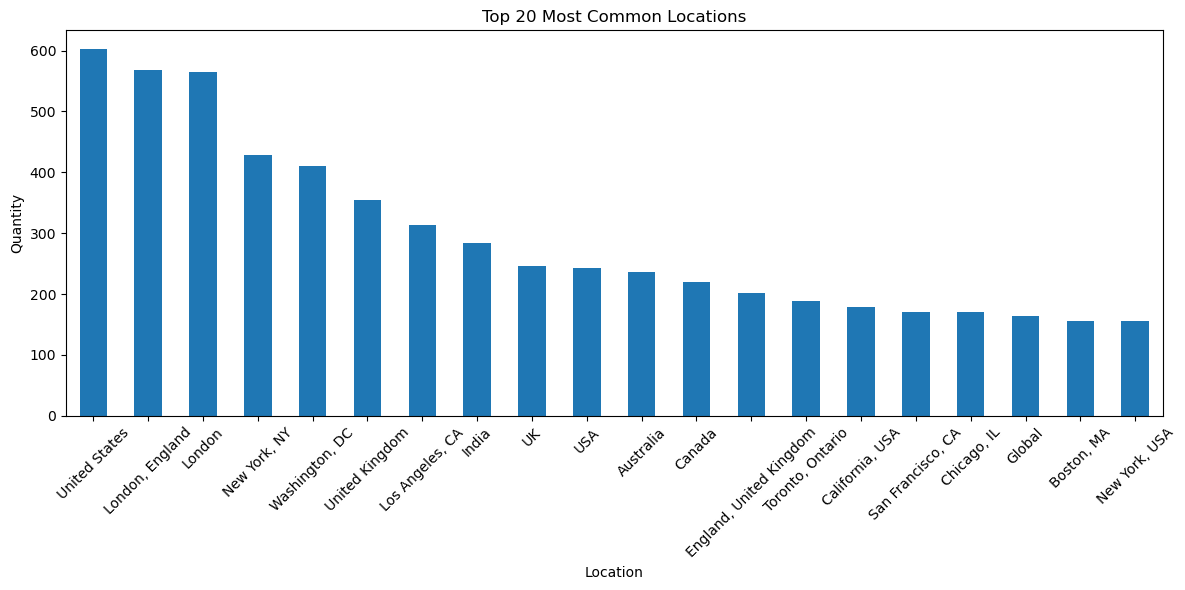

<Figure size 1800x800 with 0 Axes>

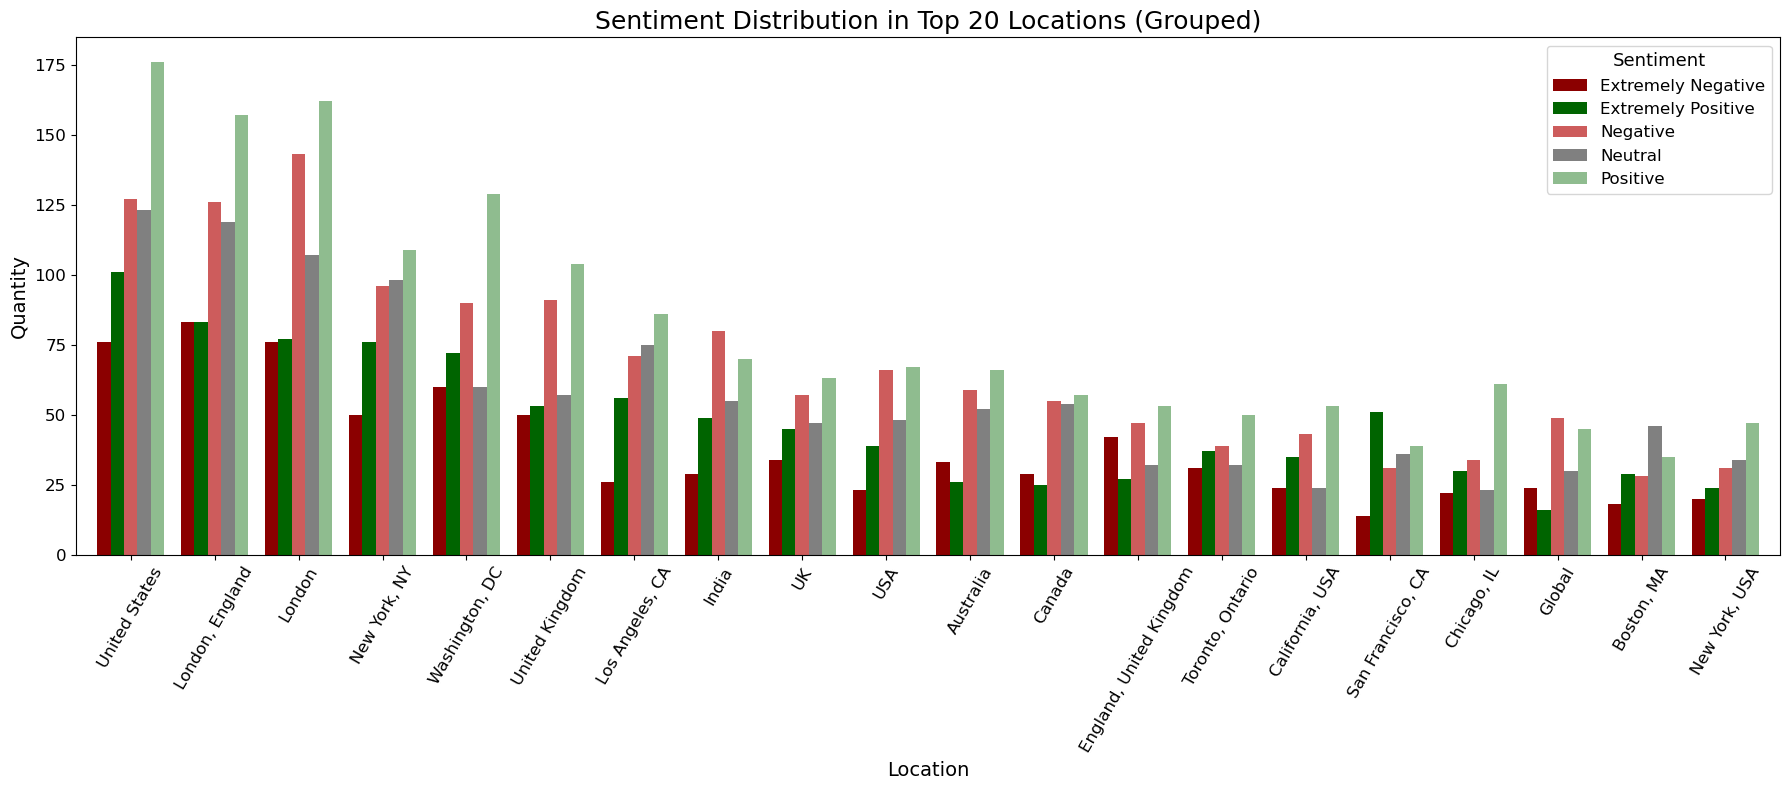

In [21]:
# Count top 20 locations
top_locations = combined_df['Location'].value_counts().nlargest(20)

# First plot - top 20 locations
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 20 Most Common Locations')
plt.xlabel('Location')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter for top 20 locations
top_location_names = top_locations.index.tolist()
filtered_df = combined_df[combined_df['Location'].isin(top_location_names)]

# Second plot - Sentiment distribution in top 20 locations
sentiment_colors = {
    'Extremely Positive': 'darkgreen',
    'Positive': 'darkseagreen',
    'Negative': 'indianred',
    'Neutral': 'grey',
    'Extremely Negative': 'darkred'
}

sentiment_counts = (
    filtered_df.groupby(['Location', 'Sentiment'])
    .size()
    .unstack(fill_value=0)
    .loc[top_location_names]
)

# Plotting stacked bar chart
plt.figure(figsize=(18, 8)) 

sentiment_counts.plot(
    kind='bar',
    stacked=False,
    color=[sentiment_colors[col] for col in sentiment_counts.columns],
    width=0.8,
    figsize=(18, 8),
)

plt.title('Sentiment Distribution in Top 20 Locations (Grouped)', fontsize=18)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

Location is a highly diverse and user-defined field that lacks standardization. Many values are inconsistent, misspelled, or creatively formatted (e.g., “i love you so much || he/him” or “Watford, South Oxhey, Bushey”), making them difficult to normalize or meaningfully group.

Additionally, there are 13,127 unique location values, with the vast majority appearing only once.

The top 20 most common locations show a strong concentration of tweets from the United States, England, and major urban centers like New York and London.
However, no single sentiment clearly dominates in any specific location, suggesting that geographic origin is not a strong predictor of sentiment.

#### This high sparsity and noise significantly reduce the utility of the Location column for sentiment classification, and it is therefore excluded from the final model input.

## column 4- TweetAt:

In [38]:
# Sample of unique values
print("Unique TweetAt values:")
print(combined_df['TweetAt'].unique()[:10])

# Format analysis
print("\nData type:", combined_df['TweetAt'].dtype)

# Parse the TweetAt column as datetime
combined_df['TweetAt'] = pd.to_datetime(combined_df['TweetAt'], format='%d-%m-%Y', errors='coerce')
# Extract month-year from the datetime
combined_df['MonthYear'] = combined_df['TweetAt'].dt.to_period('M')
print("\n")

# Count tweets per month
print("Tweet counts per month:")
print(combined_df['MonthYear'].value_counts().sort_index())
print("\n")

# Daily tweet count
print("Tweet counts per day:")
print(combined_df['TweetAt'].value_counts().sort_index())
print('Total: ' + str(combined_df['TweetAt'].value_counts().count())+' days')

Unique TweetAt values:
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020']

Data type: object


Tweet counts per month:
MonthYear
2020-03    29297
2020-04    15658
Freq: M, Name: count, dtype: int64


Tweet counts per day:
TweetAt
2020-03-02       4
2020-03-03       4
2020-03-04       8
2020-03-05       6
2020-03-06       2
2020-03-07       7
2020-03-08       9
2020-03-09      16
2020-03-10      54
2020-03-11     165
2020-03-12     685
2020-03-13    1233
2020-03-14     614
2020-03-15     519
2020-03-16    1128
2020-03-17    1977
2020-03-18    2742
2020-03-19    3215
2020-03-20    3448
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-24    1480
2020-03-25    2979
2020-03-26    1277
2020-03-27     345
2020-03-28      23
2020-03-29     125
2020-03-30      87
2020-03-31     316
2020-04-01     630
2020-04-02     954
2020-04-03     810
2020-04-04     767
2020-04-05    1131
2020-04-06    1742
2020

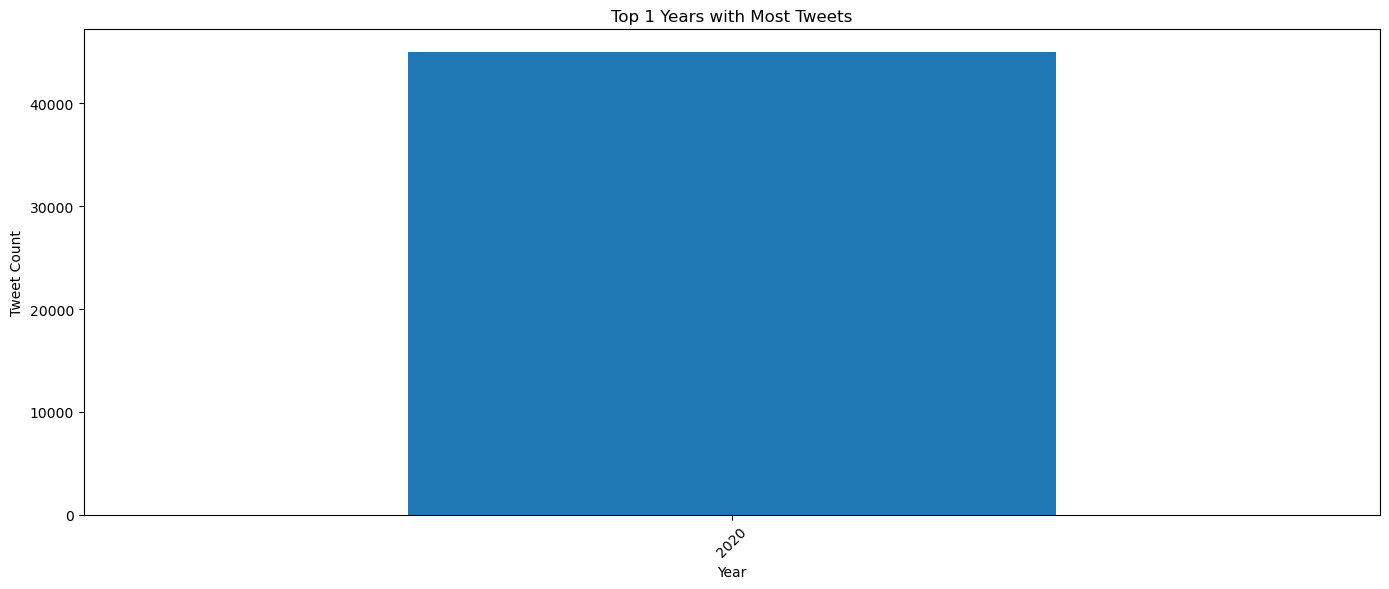

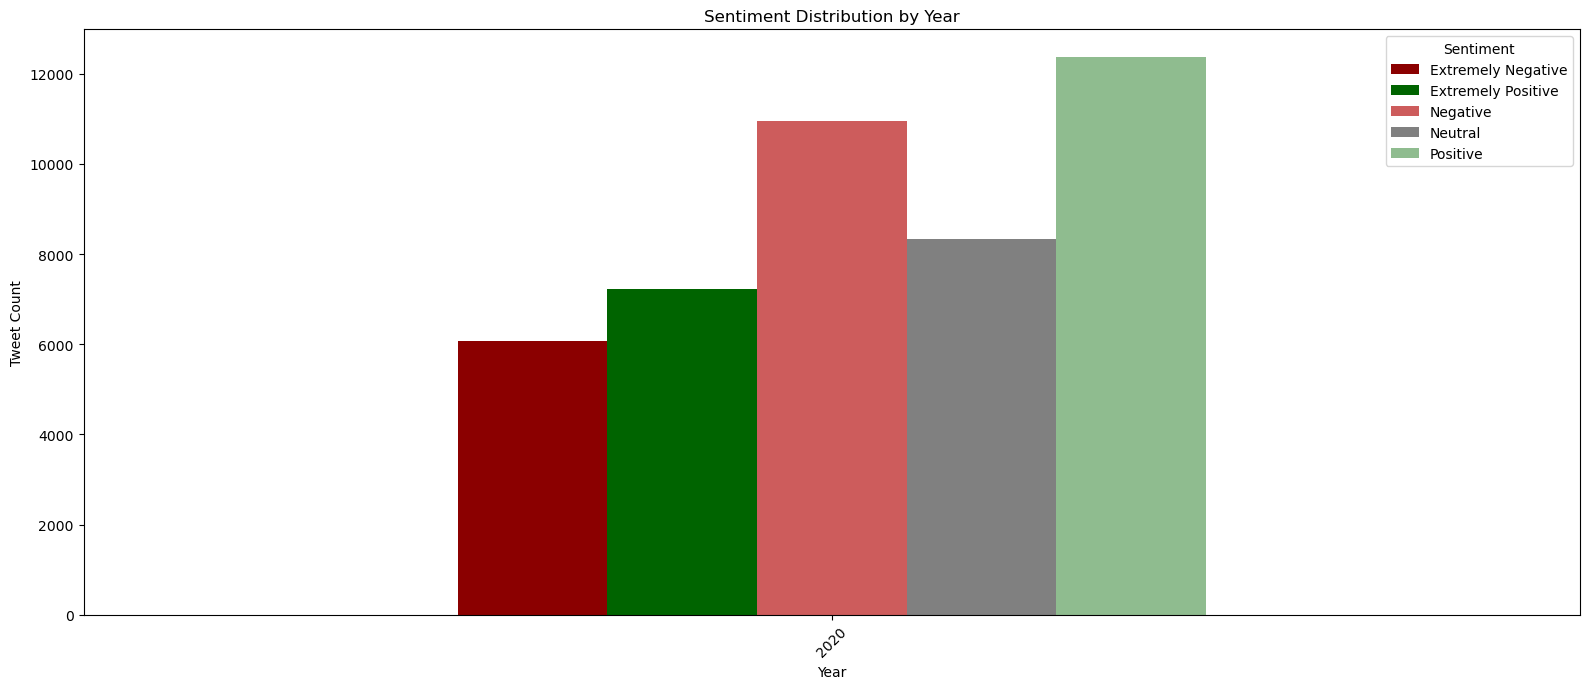

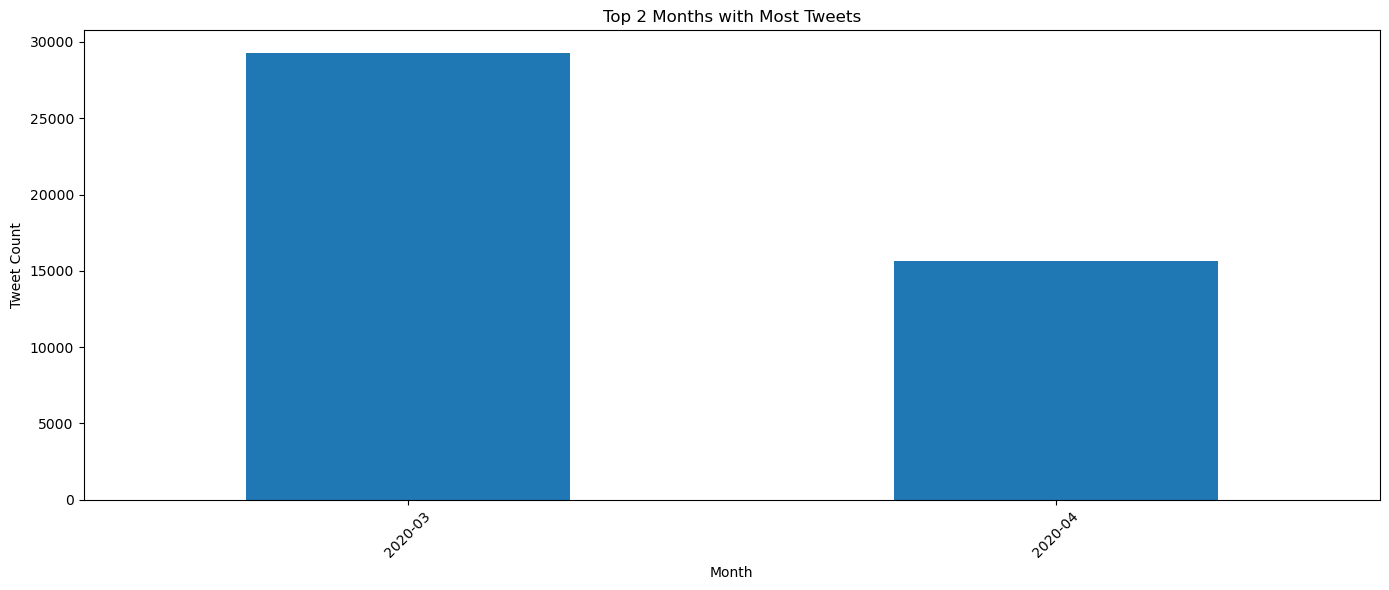

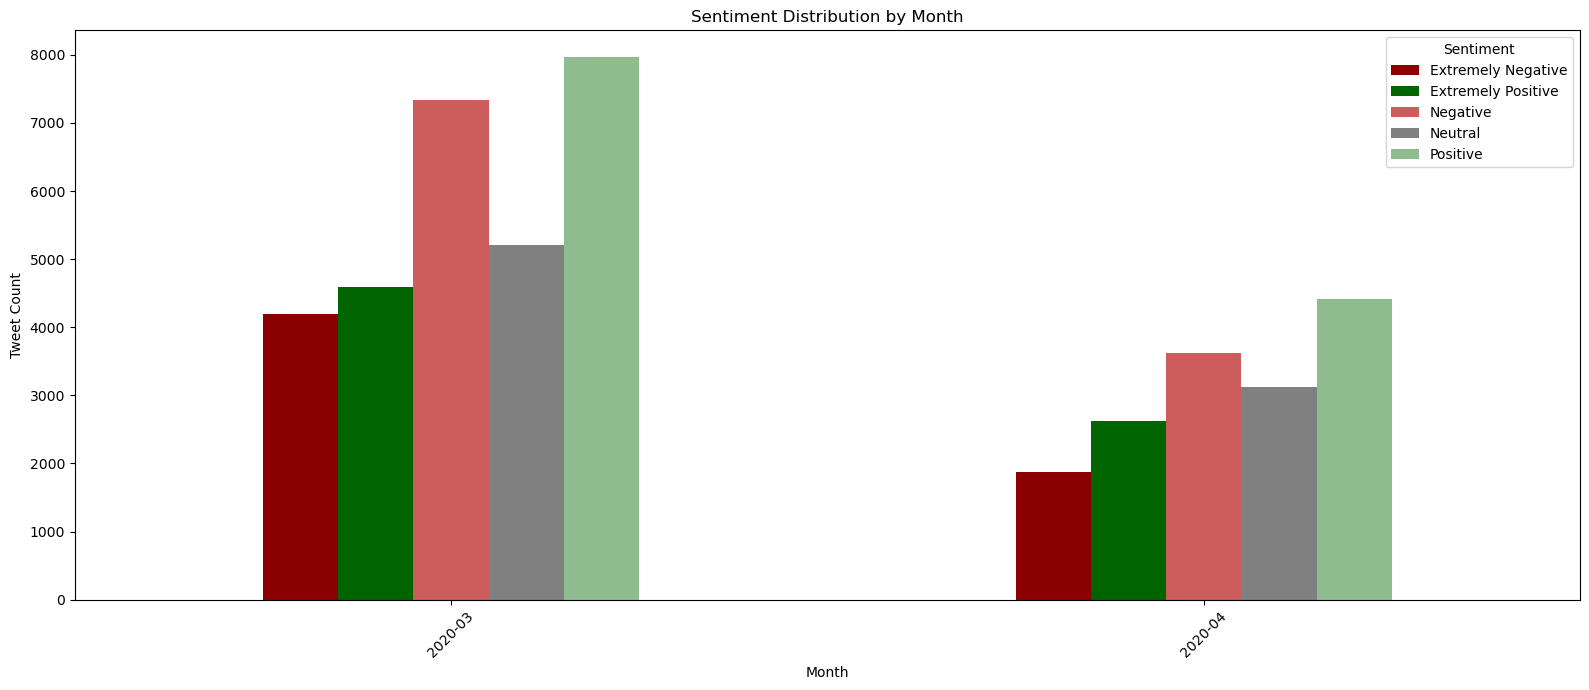

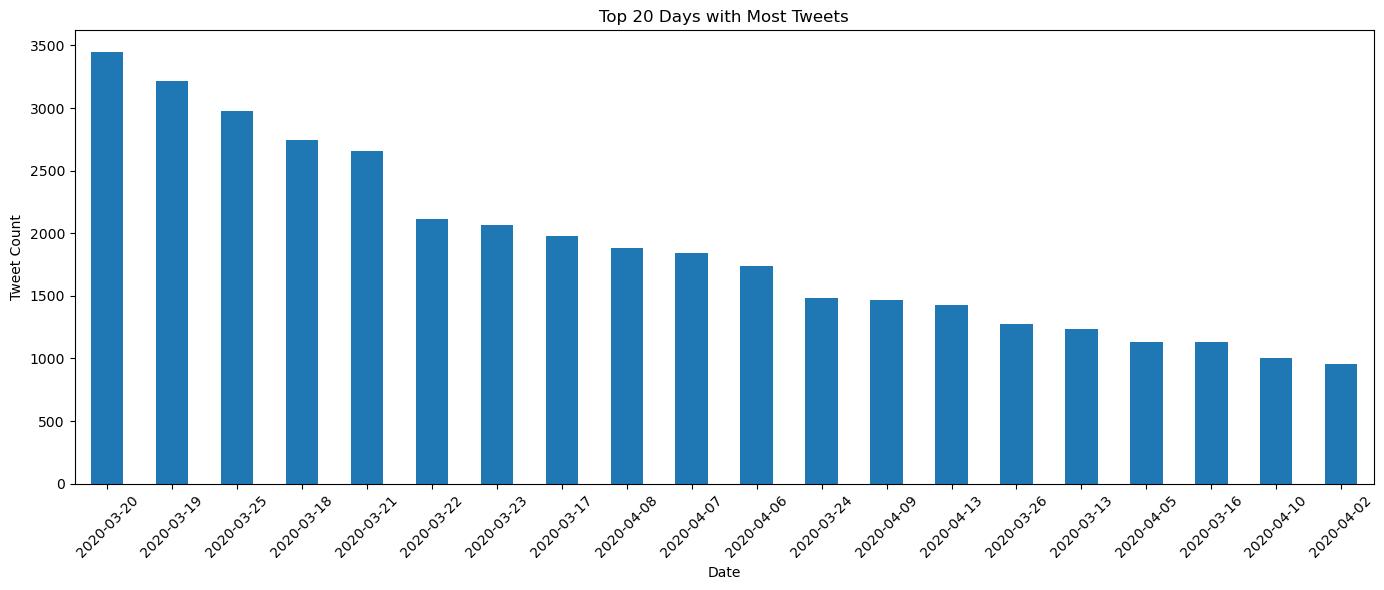

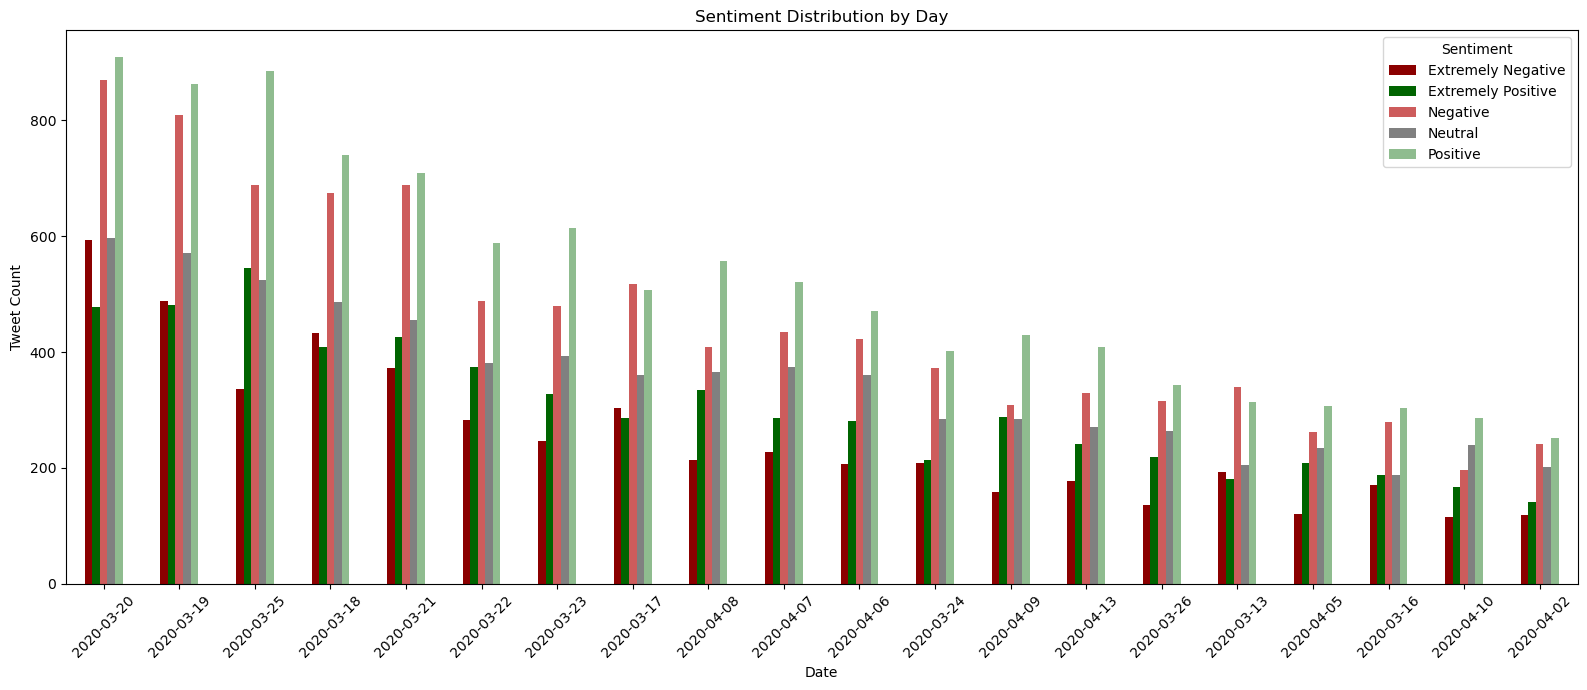

In [40]:
import matplotlib.pyplot as plt

# Extract datetime components
combined_df['Year'] = combined_df['TweetAt'].dt.year
combined_df['Month'] = combined_df['TweetAt'].dt.to_period('M').astype(str)
combined_df['Date'] = combined_df['TweetAt'].dt.date

# Define sentiment colors
sentiment_colors = {
    'Extremely Positive': 'darkgreen',
    'Positive': 'darkseagreen',
    'Negative': 'indianred',
    'Neutral': 'grey',
    'Extremely Negative': 'darkred'
}

# Function to plot top N counts of any datetime field
def plot_top_counts(df, group_col, title, top_n=20):
    unique_vals = df[group_col].nunique()
    n = min(unique_vals, top_n)  # Use smaller between actual unique values and 20
    counts = df[group_col].value_counts().nlargest(n)
    plt.figure(figsize=(14, 6))
    counts.plot(kind='bar')
    plt.title(f'Top {n} {title}')
    plt.xlabel(group_col)
    plt.ylabel('Tweet Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot sentiment distribution by time unit
def plot_sentiment_distribution(df, group_col, title, top_n=20):
    unique_vals = df[group_col].nunique()
    n = min(unique_vals, top_n)
    top_values = df[group_col].value_counts().nlargest(n).index
    filtered = df[df[group_col].isin(top_values)]
    
    sentiment_counts = (
        filtered.groupby([group_col, 'Sentiment'])
        .size()
        .unstack(fill_value=0)
        .loc[top_values]
    )
    
    sentiment_counts.plot(
        kind='bar',
        stacked=False,
        color=[sentiment_colors[col] for col in sentiment_counts.columns],
        figsize=(16, 7)
    )
    plt.title(f'Sentiment Distribution by {title}')
    plt.xlabel(group_col)
    plt.ylabel('Tweet Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

# Yearly analysis
plot_top_counts(combined_df, 'Year', 'Years with Most Tweets')
plot_sentiment_distribution(combined_df, 'Year', 'Year')

# Monthly analysis
plot_top_counts(combined_df, 'Month', 'Months with Most Tweets')
plot_sentiment_distribution(combined_df, 'Month', 'Month')

# Daily analysis
plot_top_counts(combined_df, 'Date', 'Days with Most Tweets')
plot_sentiment_distribution(combined_df, 'Date', 'Day')



TweetAt contains the posting date of each tweet, ranging only from March 16 to March 25, 2020.
Due to this short time span and the imbalance across dates, it contributes little to sentiment prediction.
**As a result, it is excluded from the model input.**



#### column 5- OriginalTweet:

In [41]:
# Show random 5 tweets from train
print("Random sample of OriginalTweet:")
print(combined_df['OriginalTweet'].sample(10, random_state=1).values)

# Add tweet length column
combined_df['TweetLength'] = combined_df['OriginalTweet'].astype(str).apply(len)

# Basic stats
print("\nTweet length stats:")
print(combined_df['TweetLength'].describe())

print("\nShortest tweets:")
print(combined_df[combined_df['TweetLength'] < 20]['OriginalTweet'].head())


Random sample of OriginalTweet:
['Dairy product prices rose, advancing for the first time since January and bolstering optimism about the outlook for demand as the world continues to grapple with covid-19. \r\r\n https://t.co/EH8CgrIBVm https://t.co/lonagS8SjT'
 'At this point I am more worried about the possibility of not being able to feed my baby son than I am of catching Coronavirus And that is what is wrong with our society Selfish wankers'
 'Damascus University prof Adnan Sleiman says food prices have increased 40-60% since February, with Al-Watan noting in its report on economic situation that "merchants and industralists have called for a partial re-opening of markets" amid COVID-19 closures https://t.co/qEfnh0YKkT'
 'DonÂ\x92t worry about your hefty medication prices during the #COVID-19 pandemic. Get free Wise Rx prescription card now to get discount on your medicines. https://t.co/5DizPLFH8p #Wiserxcard #Prescriptiondiscountcard #Coronavirus https://t.co/GggCqAfkBL'
 'Cops i


The dataset consists of mostly medium-to-long tweets (avg ~205 chars), covering personal, social, and economic reactions to COVID-19, with no dominant lexical pattern across samples.


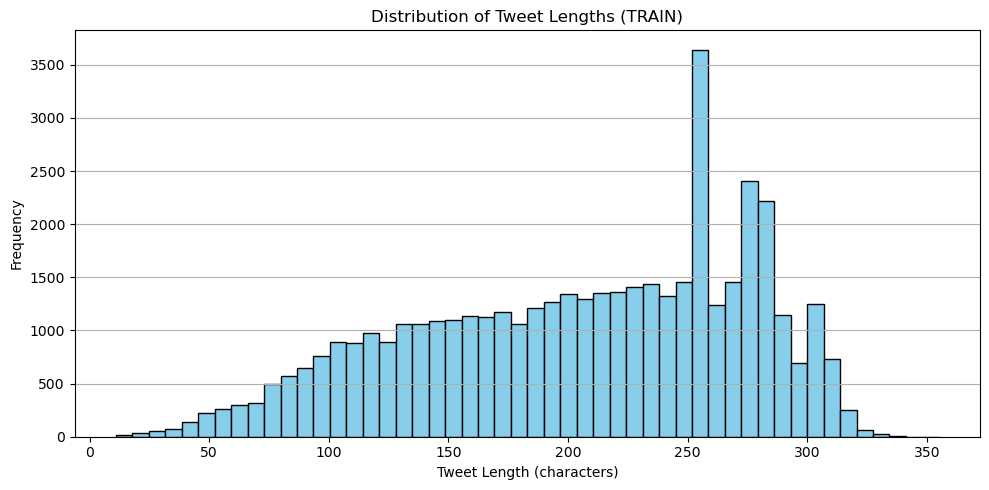

In [43]:
# Histogram plot
plt.figure(figsize=(10, 5))
plt.hist(combined_df['TweetLength'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Tweet Lengths (TRAIN)")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


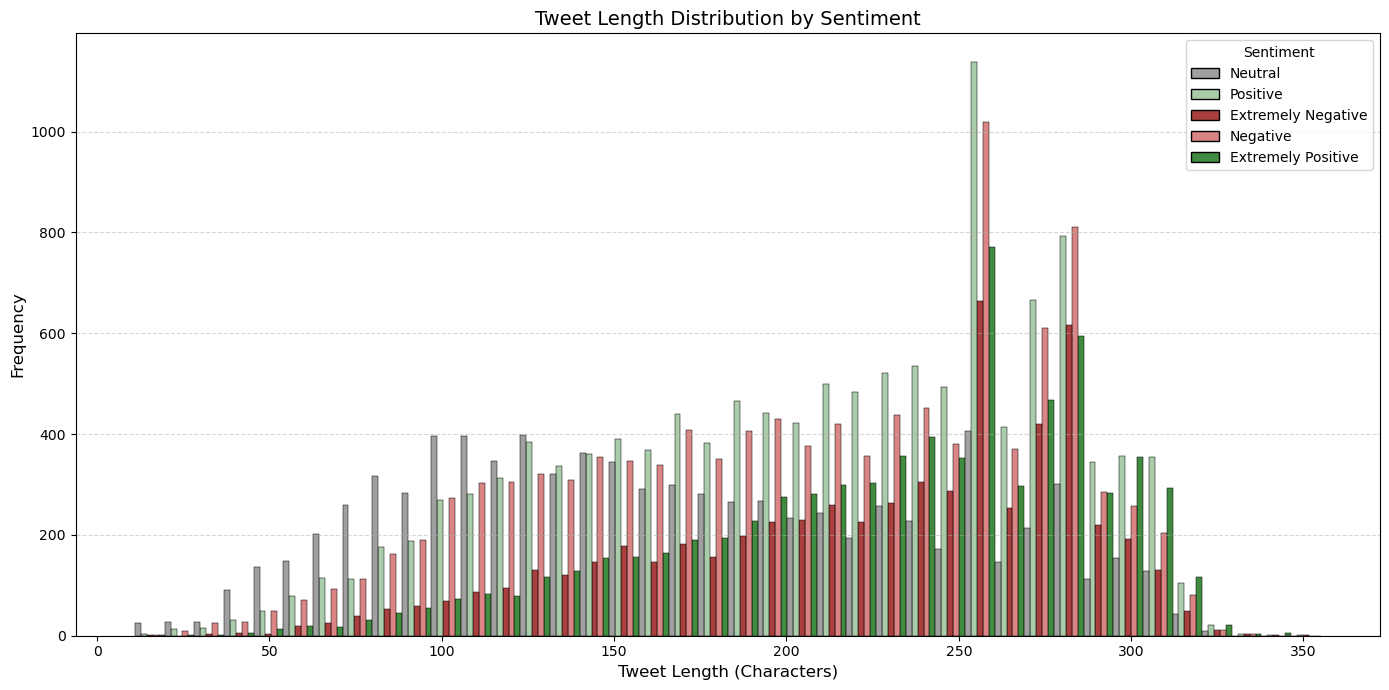

In [44]:
# Plot grouped (side-by-side) histogram of tweet lengths by sentiment
plt.figure(figsize=(14, 7))
sns.histplot(
    data=combined_df,
    x='TweetLength',
    hue='Sentiment',
    bins=40,
    kde=False,
    palette={
        'Extremely Positive': 'darkgreen',
        'Positive': 'darkseagreen',
        'Negative': 'indianred',
        'Neutral': 'grey',
        'Extremely Negative': 'darkred'
    },
    multiple='dodge'  # side-by-side bars instead of stacked
)

# Add titles and labels
plt.title("Tweet Length Distribution by Sentiment", fontsize=14)
plt.xlabel("Tweet Length (Characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/pc/7qsl31m977z57m4jg98pnnt80000gn/T/ipykernel_17265/140114591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


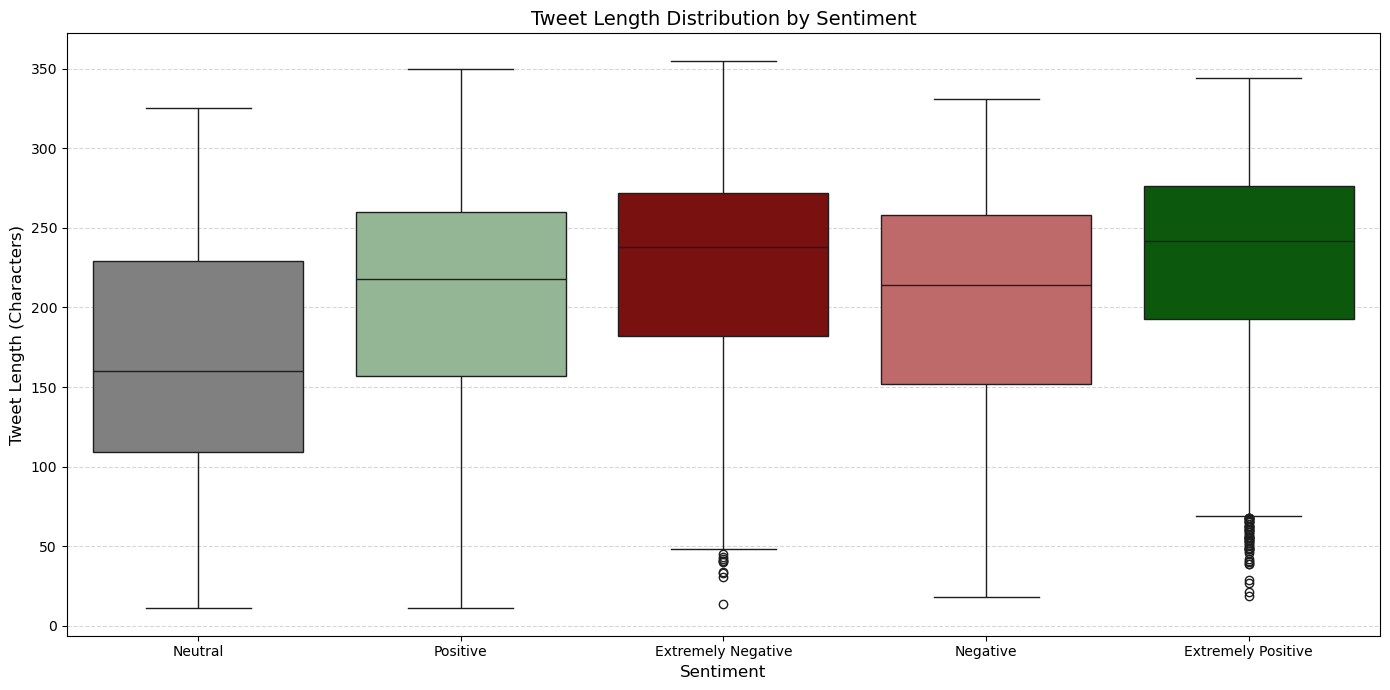

In [46]:
# Create boxplot of tweet lengths per sentiment
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=combined_df,
    x='Sentiment',
    y='TweetLength',
    palette={
        'Extremely Positive': 'darkgreen',
        'Positive': 'darkseagreen',
        'Negative': 'indianred',
        'Neutral': 'grey',
        'Extremely Negative': 'darkred'
    }
)

# Add titles and labels
plt.title("Tweet Length Distribution by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Tweet Length (Characters)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Tweet length distributions are generally consistent across sentiment classes, with slightly longer tweets observed in the 'Extremely Positive' and 'Extremely Negative' categories. However, no substantial differences were found, indicating that sentiment is not strongly associated with tweet.

##### **Emojis check**

In [49]:
# Function to extract emojis from a given text
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Apply the emoji extraction to the dataset
combined_df['emojis'] = combined_df['OriginalTweet'].apply(lambda x: extract_emojis(str(x)))

# Boolean column: whether a tweet contains at least one emoji
combined_df['has_emoji'] = combined_df['emojis'].apply(lambda x: len(x) > 0)

# Count tweets with emojis
emoji_tweet_count = combined_df['has_emoji'].sum()
total_tweets = len(combined_df)
print(f"Tweets with emojis: {emoji_tweet_count} out of {total_tweets} total")

# Flatten the list of all emojis and count their frequency
all_emojis_flat = [e for sublist in train['emojis'] for e in sublist]
emoji_counts = Counter(all_emojis_flat)

# Show the top 10 most common emojis
print("\nTop 10 most frequent emojis in the dataset:")
for emoji_char, count in emoji_counts.most_common(10):
    print(f"{emoji_char} : {count}")

# Explode the dataframe so each row corresponds to one emoji per tweet
exploded = combined_df.explode('emojis')

# Drop rows without emojis
exploded = exploded.dropna(subset=['emojis'])

# Group by (emoji, sentiment) and count number of tweets
emoji_sentiment_counts = (
    exploded.groupby(['emojis', 'Sentiment'])
    .size()
    .unstack(fill_value=0)
    .sort_values(by=exploded['Sentiment'].unique().tolist(), ascending=False)
)

# Show top emojis by total tweet count across all sentiments
emoji_sentiment_counts['Total'] = emoji_sentiment_counts.sum(axis=1)
emoji_sentiment_counts = emoji_sentiment_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Display top 10 most used emojis and their sentiment distribution
emoji_sentiment_counts.head(10)

Tweets with emojis: 55 out of 44955 total

Top 10 most frequent emojis in the dataset:
© : 65
® : 5


Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
emojis,,,,,
©,4,9,12,29,17
®,1,1,1,1,1


Emojis appear in only 55 out of 44,955 tweets, indicating extremely sparse usage. The most frequent emoji is ©, found in 65 tweets across all sentiment classes, with no strong association between specific emojis and sentiment.

no valuable emojis found. > erase coloumns 

In [50]:
# Remove irrelevant emoji columns
train.drop(columns=['emojis', 'has_emoji'], inplace=True)
print ("Deleted")

Deleted


#### **Smiley check**

In [51]:
emoticon_dict = {
    # Happy / Smile
    r":\)": "happy",
    r":-\)": "happy",
    r"\(:": "happy",
    r"\(-:": "happy",
    r":D": "happy",
    r":-D": "happy",
    r"=D": "happy",
    r";\)": "happy",        # wink
    r";-\)": "happy",       # wink
    r":\]": "happy",
    r"\^_\^": "happy",
    
    # Sad
    r":\(": "sad",
    r":-\(": "sad",
    r"\):": "sad",
    r":'\(": "sad",         # crying
    r"T_T": "sad",

    # Neutral / Confused / Other
    r":/": "neutral",
    r":-\|": "neutral",
    r":\|": "neutral",
    r":o": "surprised",
    r":O": "surprised",
    r":-O": "surprised",
    r">:\(": "angry",
    r">:O": "angry",
}


In [54]:
# Initialize a structure to hold counts
emoticon_data = defaultdict(lambda: defaultdict(int))

# Compile regex patterns
compiled_emoticons = {re.compile(k): v for k, v in emoticon_dict.items()}

# Iterate over tweets
for _, row in combined_df.iterrows():
    tweet = str(row['OriginalTweet'])
    sentiment = row['Sentiment']
    for pattern, emotion_label in compiled_emoticons.items():
        if pattern.search(tweet):
            emoticon_data[pattern.pattern]['emotion'] = emotion_label
            emoticon_data[pattern.pattern][sentiment] += 1

# Convert to DataFrame
emoticon_summary = pd.DataFrame.from_dict(emoticon_data, orient='index')
emoticon_summary = emoticon_summary.fillna(0).astype({'emotion': 'category'})

# Reorder columns: emotion first
cols = ['emotion'] + [col for col in emoticon_summary.columns if col != 'emotion']
emoticon_summary = emoticon_summary[cols]

emoticon_summary


,emotion,Neutral,Positive,Extremely Negative,Extremely Positive,Negative
:/,neutral,4974.0,5883.0,2346.0,3247.0,4964.0
\):,sad,7.0,16.0,3.0,1.0,12.0
:\),happy,5.0,11.0,0.0,5.0,6.0
:\(,sad,1.0,7.0,4.0,1.0,2.0
:D,happy,1.0,3.0,1.0,0.0,2.0
;\),happy,2.0,2.0,0.0,3.0,0.0
:-\(,sad,0.0,0.0,2.0,0.0,1.0
=D,happy,0.0,1.0,0.0,0.0,0.0
:-\|,neutral,0.0,1.0,0.0,0.0,0.0
:-\),happy,0.0,2.0,0.0,2.0,1.0


The high frequency of the ':/'' emoticon across all sentiment classes appears to be inflated due to its presence in URLs (e.g., 'http://'). After removing links from the tweets, the actual emotional usage of this emoticon can be assessed more reliably.

In [57]:
# Function to clean URLs from tweet text
def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", str(text))

# Temporary column without URLs
combined_df['TempClean'] = combined_df['OriginalTweet'].apply(remove_urls)

# Re-run emoticon detection on cleaned text
emoticon_data_clean = defaultdict(lambda: defaultdict(int))

for _, row in combined_df.iterrows():
    tweet = row['TempClean']
    sentiment = row['Sentiment']
    for pattern, emotion_label in compiled_emoticons.items():
        if pattern.search(tweet):
            emoticon_data_clean[pattern.pattern]['emotion'] = emotion_label
            emoticon_data_clean[pattern.pattern][sentiment] += 1

# Convert to DataFrame
emoticon_summary_clean = pd.DataFrame.from_dict(emoticon_data_clean, orient='index')
emoticon_summary_clean = emoticon_summary_clean.fillna(0).astype({'emotion': 'category'})
emoticon_summary_clean = emoticon_summary_clean[['emotion'] + [c for c in emoticon_summary_clean.columns if c != 'emotion']]

emoticon_summary_clean

,emotion,Negative,Positive,Neutral,Extremely Negative,Extremely Positive
\):,sad,12.0,16.0,7.0,3.0,1.0
:\),happy,6.0,11.0,5.0,0.0,5.0
:/,neutral,2.0,0.0,1.0,2.0,0.0
:\(,sad,2.0,7.0,1.0,4.0,1.0
:D,happy,2.0,3.0,1.0,1.0,0.0
;\),happy,0.0,2.0,2.0,0.0,3.0
:-\(,sad,1.0,0.0,0.0,2.0,0.0
=D,happy,0.0,1.0,0.0,0.0,0.0
:-\|,neutral,0.0,1.0,0.0,0.0,0.0
:-\),happy,1.0,2.0,0.0,0.0,2.0


Text-based emoticons appear very rarely in the dataset, with each pattern occurring fewer than 20 times. Among them, happy and sad emoticons (e.g., :), :() are the most common, but **show no strong or consistent association with a specific sentiment label.**

In [61]:
# Collapse by high-level emotion category: happy / sad / neutral
# We'll reuse the 'emotion' field from earlier, and group by it

# Aggregate the counts across all emoticons by emotion type
collapsed_emoticons = emoticon_summary_clean.groupby('emotion').sum()

# Reorder columns if needed
collapsed_emoticons = collapsed_emoticons[['Negative', 'Positive', 'Neutral', 'Extremely Negative', 'Extremely Positive']]

collapsed_emoticons


/var/folders/pc/7qsl31m977z57m4jg98pnnt80000gn/T/ipykernel_17265/1169109148.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collapsed_emoticons = emoticon_summary_clean.groupby('emotion').sum()


,Negative,Positive,Neutral,Extremely Negative,Extremely Positive
emotion,,,,,
happy,9.0,19.0,8.0,1.0,10.0
neutral,2.0,1.0,1.0,2.0,1.0
sad,15.0,24.0,8.0,9.0,2.0
surprised,0.0,2.0,1.0,1.0,1.0



When grouping text-based emoticons by emotional category, 'happy' and 'sad' types appear most frequently. However, both are distributed across all sentiment classes, with no strong correlation between emoticon emotion and labeled sentiment — indicating that emoticons in this dataset are **not reliable sentiment indicators.**

no valuable smileys found. > erase coloumn

In [59]:
combined_df.drop(columns='TempClean', inplace=True)

#### **Hashtags check**

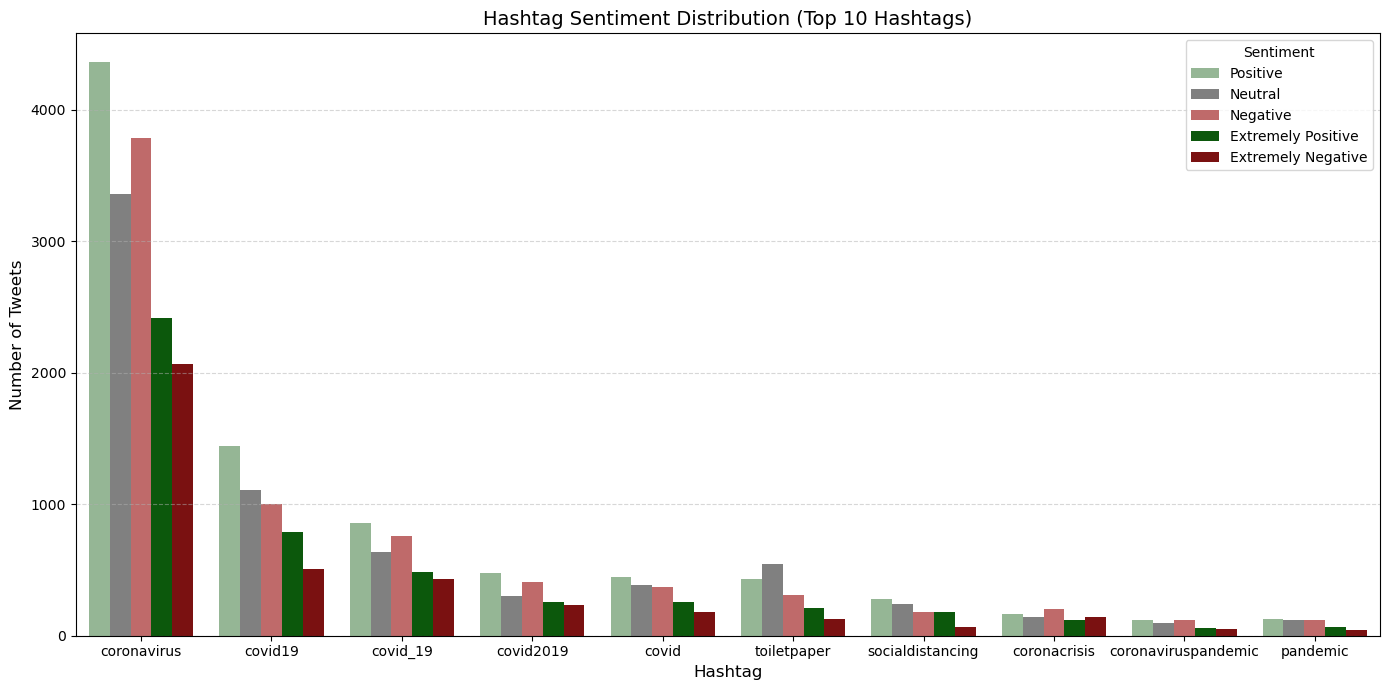

In [65]:
# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text).lower())

# Extract and flatten hashtags
all_hashtags = combined_df['OriginalTweet'].apply(extract_hashtags)
flat_hashtags = [tag for sublist in all_hashtags for tag in sublist]

# Top N hashtags
top_n = 10
top_hashtags = [tag for tag, _ in Counter(flat_hashtags).most_common(top_n)]
# Count absolute hashtag occurrences per sentiment (5-class)
sentiment_labels = ['Positive', 'Neutral', 'Negative', 'Extremely Positive', 'Extremely Negative']

hashtag_sentiment_counts = {tag: {s: 0 for s in sentiment_labels} for tag in top_hashtags}

for _, row in train.iterrows():
    sentiment = row['Sentiment']  # Adjust this if your column is named differently
    tags = extract_hashtags(row['OriginalTweet'])
    for tag in tags:
        tag = tag.lower()
        if tag in top_hashtags:
            hashtag_sentiment_counts[tag][sentiment] += 1

# Build DataFrame
data = []
for tag in top_hashtags:
    for sentiment in sentiment_labels:
        count = hashtag_sentiment_counts[tag][sentiment]
        data.append({
            'Hashtag': tag,
            'Sentiment': sentiment,
            'Count': count
        })

df_counts = pd.DataFrame(data)

# Pivot to table format
df_pivot_counts = df_counts.pivot(index='Hashtag', columns='Sentiment', values='Count').fillna(0)
df_pivot_counts['Total Count'] = df_pivot_counts.sum(axis=1)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_counts,
    x='Hashtag',
    y='Count',
    hue='Sentiment',
    palette={
        'Positive': 'darkseagreen',
        'Neutral': 'grey',
        'Negative': 'indianred',
        'Extremely Positive': 'darkgreen',
        'Extremely Negative': 'darkred'
    }
)

plt.title("Hashtag Sentiment Distribution (Top 10 Hashtags)", fontsize=14)
plt.xlabel("Hashtag", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Using percentages instead of absolute counts allows for a fair comparison across hashtags with varying frequencies. Some hashtags appear in only a handful of tweets, while others occur in dozens or hundreds. By calculating sentiment percentages, we focus on the emotional distribution rather than popularity, which helps reveal patterns that are not biased by hashtag volume.



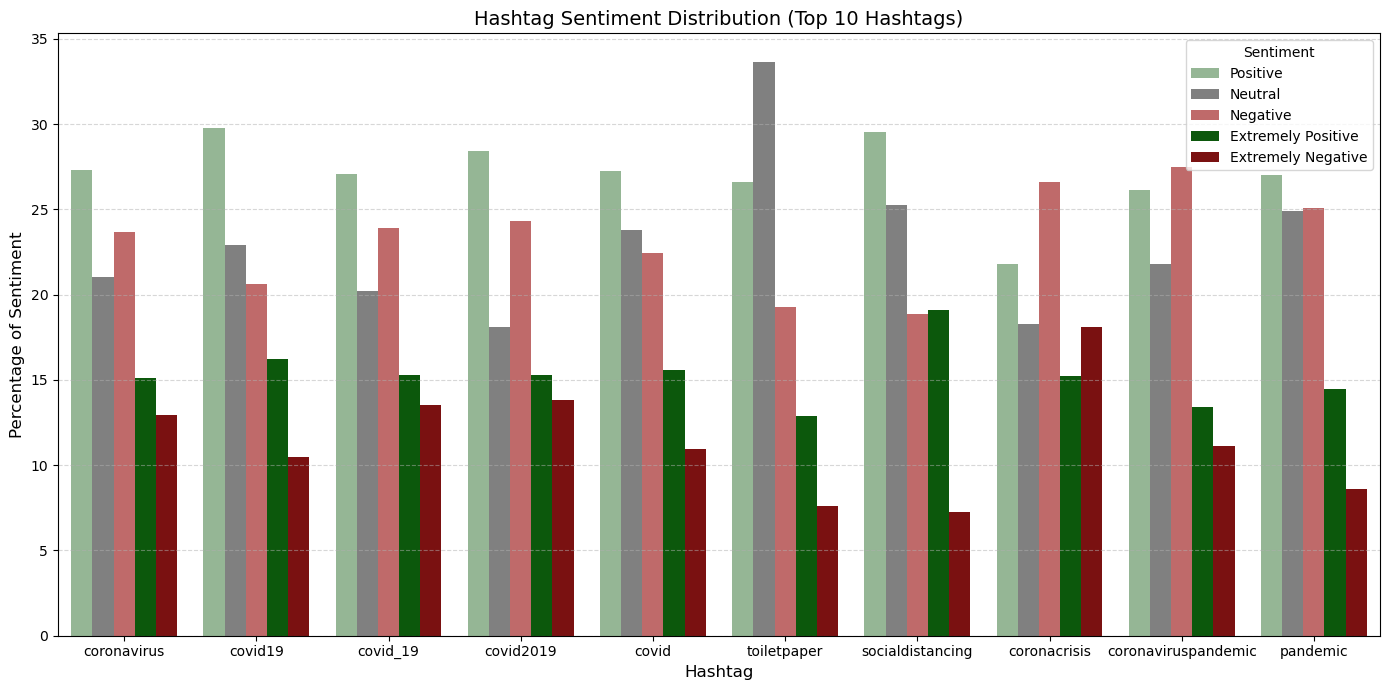

In [67]:
# Count hashtag occurrences per sentiment
hashtag_sentiment_counts = {tag: {s: 0 for s in sentiment_labels} for tag in top_hashtags}

for _, row in train.iterrows():
    sentiment = row['Sentiment']  
    tags = extract_hashtags(row['OriginalTweet'])
    for tag in tags:
        tag = tag.lower()
        if tag in top_hashtags:
            hashtag_sentiment_counts[tag][sentiment] += 1

# Build DataFrame with percentages
data = []
for tag in top_hashtags:
    total = sum(hashtag_sentiment_counts[tag].values())
    for sentiment in sentiment_labels:
        percent = (hashtag_sentiment_counts[tag][sentiment] / total) * 100 if total > 0 else 0
        data.append({
            'Hashtag': tag,
            'Sentiment': sentiment,
            'Percentage': round(percent, 2),
            'Total Count': total
        })

df_percent = pd.DataFrame(data)

# Pivot to table format
df_pivot = df_percent.pivot(index='Hashtag', columns='Sentiment', values='Percentage').fillna(0)
df_pivot['Total Count'] = df_percent.groupby('Hashtag')['Total Count'].first()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_percent,
    x='Hashtag',
    y='Percentage',
    hue='Sentiment',
    palette={
        'Positive': 'darkseagreen',
        'Neutral': 'grey',
        'Negative': 'indianred',
        'Extremely Positive': 'darkgreen',
        'Extremely Negative': 'darkred'
    }
)

plt.title("Hashtag Sentiment Distribution (Top 10 Hashtags)", fontsize=14)
plt.xlabel("Hashtag", fontsize=12)
plt.ylabel("Percentage of Sentiment", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


No single hashtag is strongly dominated by one sentiment. While some tags like #covid19 lean slightly positive and others like #coronacrisis lean negative, the sentiment distribution remains relatively mixed—suggesting that hashtags are used across various emotional contexts rather than reflecting a single tone.

Extend the search: 

In [69]:
# Top 50 hashtags
top_50_hashtags = [tag for tag, _ in Counter(flat_hashtags).most_common(50)]

# Count hashtag occurrences per sentiment (Top 50 hashtags)
hashtag_sentiment_counts_50 = {tag: {s: 0 for s in sentiment_labels} for tag in top_50_hashtags}

for _, row in train.iterrows():
    sentiment = row['Sentiment']
    tags = extract_hashtags(row['OriginalTweet'])
    for tag in tags:
        tag = tag.lower()
        if tag in top_50_hashtags:
            hashtag_sentiment_counts_50[tag][sentiment] += 1

# Build DataFrame
data = []
for tag in top_50_hashtags:
    for sentiment in sentiment_labels:
        count = hashtag_sentiment_counts_50[tag][sentiment]
        data.append({
            'Hashtag': tag,
            'Sentiment': sentiment,
            'Count': count
        })

df_counts_50 = pd.DataFrame(data)

# Pivot to wide format
df_pivot_50 = df_counts_50.pivot(index='Hashtag', columns='Sentiment', values='Count').fillna(0).astype(int)
df_pivot_50['Total Count'] = df_pivot_50.sum(axis=1)

df_pivot_50


Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,Total Count
Hashtag,,,,,,
amazon,8,15,34,25,33,115
china,25,11,36,34,33,139
consumer,15,19,37,78,61,210
corona,23,56,90,126,129,424
coronacrisis,139,117,204,140,167,767
coronaoutbreak,2,5,13,14,8,42
coronapocalypse,4,7,10,7,11,39
coronavirus,2065,2413,3783,3362,4363,15986
coronaviruslockdown,7,16,30,23,48,124


Although some hashtags show slight sentiment leanings (e.g., #coronacrisis is more negative, #handsanitizer leans positive), overall the distribution remains diverse. Hashtags tend to be used across multiple sentiment types, and no strong polarity pattern is consistently dominant.

Lets inspect the number of hashtages: 

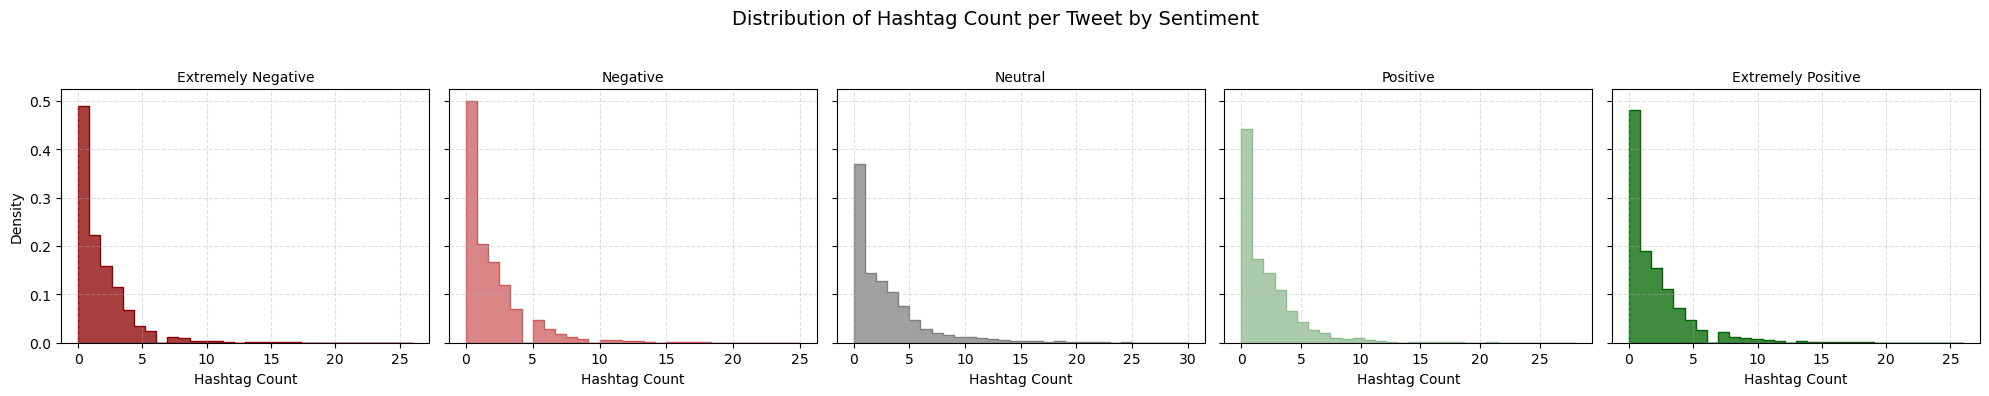

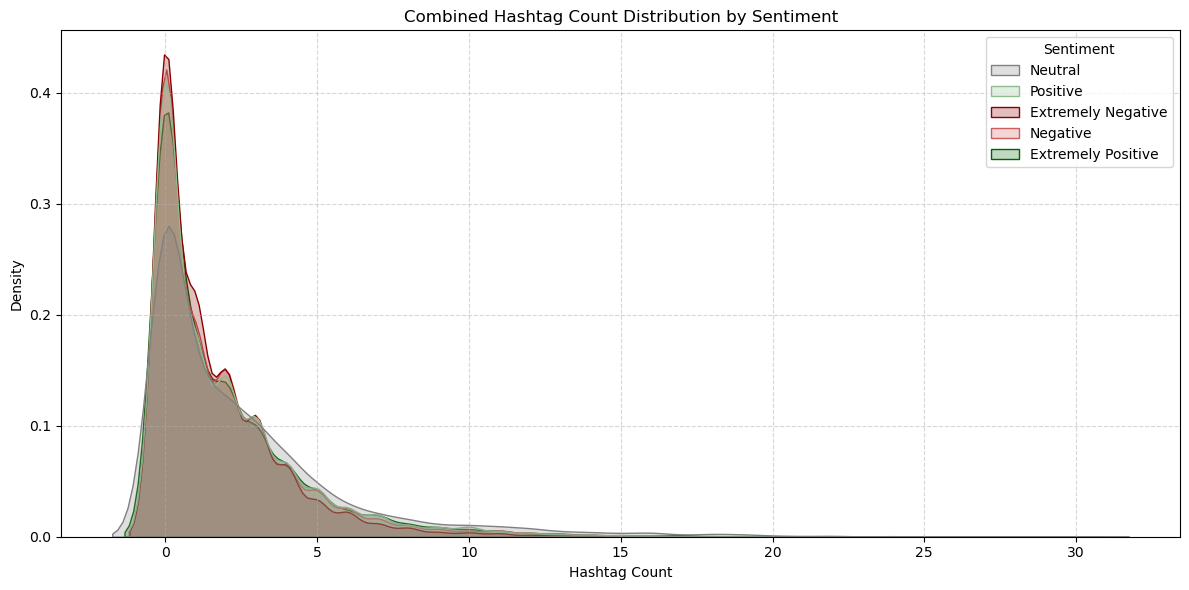

In [86]:
# Extract hashtags from each tweet
combined_df['hashtags'] = combined_df['OriginalTweet'].apply(extract_hashtags)

# Count number of hashtags per tweet
combined_df['hashtag_count'] = combined_df['hashtags'].apply(len)

# Compute average hashtag count for each sentiment
avg_hashtags_per_sentiment = combined_df.groupby('Sentiment')['hashtag_count'].mean().round(2)

sentiment_order = [
    'Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'
]
# Define sentiment colors
sentiment_palette = {
    'Extremely Negative': 'darkred',
    'Negative': 'indianred',
    'Neutral': 'grey',
    'Positive': 'darkseagreen',
    'Extremely Positive': 'darkgreen'
}

sentiments = combined_df['Sentiment'].unique()
# Set up the figure
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, sentiment in enumerate(sentiment_order):
    ax = axes[i]
    sns.histplot(
        data=combined_df[combined_df['Sentiment'] == sentiment],
        x='hashtag_count',
        stat='density',
        bins=30,
        element='step',
        color=sentiment_palette[sentiment],
        ax=ax
    )
    ax.set_title(f"{sentiment}", fontsize=10)
    ax.set_xlabel("Hashtag Count")
    if i == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.4)

fig.suptitle('Distribution of Hashtag Count per Tweet by Sentiment', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Final subplot: combined KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_df, x='hashtag_count', hue='Sentiment', fill=True, common_norm=False, palette=sentiment_palette)
plt.title('Combined Hashtag Count Distribution by Sentiment')
plt.xlabel('Hashtag Count')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


While all sentiment categories show a similar right-skewed distribution, Neutral tweets consistently exhibit fewer hashtags on average compared to emotionally charged tweets. In contrast, Extremely Positive and Extremely Negative tweets tend to include more hashtags, suggesting that users expressing stronger opinions or emotions are more likely to use hashtags to amplify their message or join wider conversations.

In [87]:
# Define maximum hashtag count observed
max_hashtags = combined_df['hashtag_count'].max()

# Initialize a DataFrame to hold counts per sentiment for each hashtag count
hashtag_distribution = pd.DataFrame(0, index=range(0, max_hashtags + 1), columns=combined_df['Sentiment'].unique())

# Populate the table by counting sentiment occurrences for each hashtag count
for sentiment in combined_df['Sentiment'].unique():
    counts = combined_df[combined_df['Sentiment'] == sentiment]['hashtag_count'].value_counts()
    for hashtag_count, count in counts.items():
        hashtag_distribution.at[hashtag_count, sentiment] = count

hashtag_distribution

,Neutral,Positive,Extremely Negative,Negative,Extremely Positive
0,3077,5109,2576,4555,3014
1,1206,2004,1177,1858,1186
2,1061,1674,833,1533,971
3,869,1248,607,1095,694
4,626,760,356,640,455
5,396,501,182,427,291
6,239,300,125,256,162
7,174,232,66,166,139
8,133,122,46,107,80
9,90,100,24,71,61


Focuse on the largest amount of #:

/var/folders/pc/7qsl31m977z57m4jg98pnnt80000gn/T/ipykernel_17265/2311489395.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Bin', 'Sentiment'])


Sentiment,Neutral,Positive,Extremely Negative,Negative,Extremely Positive
Bin,,,,,
11–15,247,166,45,157,96
16–20,99,34,13,32,22
21–25,20,11,0,5,3
26–30,5,1,1,0,1


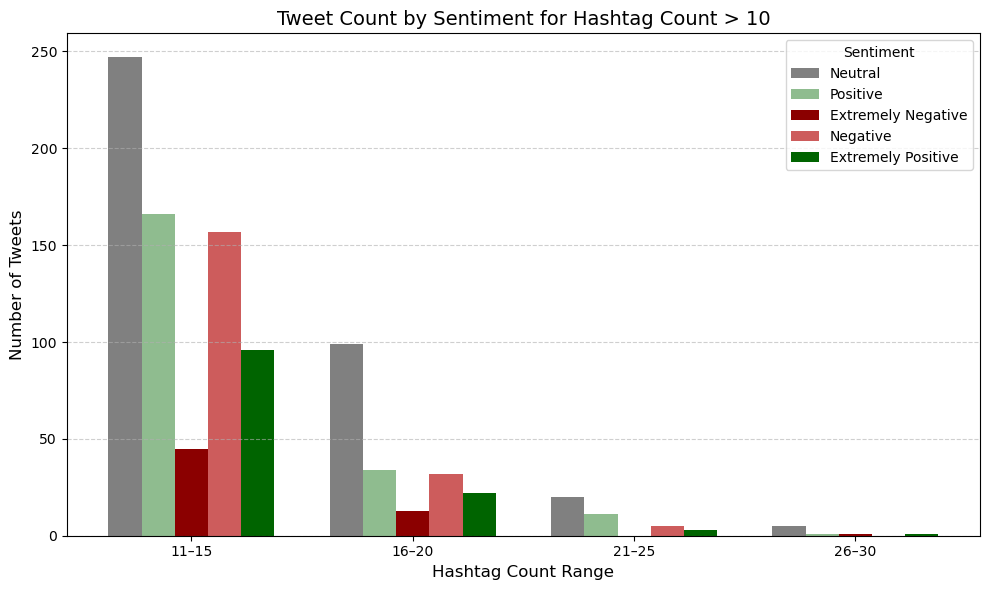

In [97]:
# Bin the hashtag counts into intervals
bins = [10, 15, 20, 25, 30]
labels = ['11–15', '16–20', '21–25', '26–30']
# Create a new column 'Bin' only for tweets with hashtag_count > 10
combined_df['Bin'] = pd.cut(combined_df['hashtag_count'], bins=bins, labels=labels, right=True, include_lowest=False)

# Count number of tweets per sentiment for each bin
binned_counts = (
    combined_df[combined_df['hashtag_count'] > 10]
    .groupby(['Bin', 'Sentiment'])
    .size()
    .unstack(fill_value=0)
)

# Order columns for consistency
sentiment_order = ['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']
binned_counts = binned_counts[sentiment_order]

# Display the table
display(binned_counts)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = range(len(binned_counts))
colors = ['gray', 'darkseagreen', 'darkred', 'indianred', 'darkgreen']

for i, sentiment in enumerate(sentiment_order):
    plt.bar([x + i * bar_width for x in index],
            binned_counts[sentiment],
            width=bar_width,
            label=sentiment,
            color=colors[i])

plt.title('Tweet Count by Sentiment for Hashtag Count > 10', fontsize=14)
plt.xlabel('Hashtag Count Range', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks([x + 2 * bar_width for x in index], binned_counts.index)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Unite #:

In [108]:
# Filter hashtags that contain 'covid' or 'corona' (case-insensitive)
# Step 1: Flatten all hashtags with corresponding sentiment
hashtag_sentiment_pairs = []

for _, row in combined_df.iterrows():
    sentiment = row['Sentiment']
    hashtags = extract_hashtags(row['OriginalTweet'])
    for tag in hashtags:
        tag_lower = tag.lower()
        if 'covid' in tag_lower or 'corona' in tag_lower:
            hashtag_sentiment_pairs.append((tag_lower, sentiment))

# Step 2: Create DataFrame
df_covid_corona = pd.DataFrame(hashtag_sentiment_pairs, columns=['Hashtag', 'Sentiment'])

# Step 3: Count frequencies of each hashtag per sentiment
hashtag_sentiment_table = df_covid_corona.groupby(['Hashtag', 'Sentiment']).size().unstack(fill_value=0)

# Step 4: Group total usage per sentiment (across all covid/corona hashtags)
group_total_by_sentiment = df_covid_corona['Sentiment'].value_counts()

# Normalize (optional) to percentages for comparison
group_percentages = (group_total_by_sentiment / group_total_by_sentiment.sum() * 100).round(2)

# Sort the main hashtag table by total occurrences
hashtag_sentiment_table['Total'] = hashtag_sentiment_table.sum(axis=1)
hashtag_sentiment_table_sorted = hashtag_sentiment_table.sort_values(by='Total', ascending=False).drop(columns='Total')
# Output tables
display(hashtag_sentiment_table_sorted)
print("Total Hashtag Mentions by Sentiment")
display(group_total_by_sentiment)
print("Percentage of Hashtag Mentions by Sentiment")
display(group_percentages)

# Step 5: Count how many corona/covid hashtags per sentiment
corona_hashtag_counts = df_covid_corona['Sentiment'].value_counts().sort_index()

# Step 6: Count total number of tweets per sentiment (from full dataset)
total_tweets_per_sentiment = combined_df['Sentiment'].value_counts().sort_index()

# Step 7: Compute percentage of tweets with corona/covid hashtags per sentiment
percentage_per_sentiment = ((corona_hashtag_counts / total_tweets_per_sentiment) * 100).round(2)

# Step 8: Build summary DataFrame
summary_df = pd.DataFrame({
    'Total Tweets': total_tweets_per_sentiment,
    'Corona/Covid Hashtag Tweets': corona_hashtag_counts,
    'Percentage (%)': percentage_per_sentiment
}).fillna(0)
print("Percentage of Sentiment Mentions Hashtag from corona\covid fam ")
display(summary_df)



<>:50: SyntaxWarning: invalid escape sequence '\c'
<>:50: SyntaxWarning: invalid escape sequence '\c'
/var/folders/pc/7qsl31m977z57m4jg98pnnt80000gn/T/ipykernel_17265/1407409333.py:50: SyntaxWarning: invalid escape sequence '\c'
  print("Percentage of Sentiment Mentions Hashtag from corona\covid fam ")


Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
Hashtag,,,,,
coronavirus,2268,2629,4142,3612,4681
covid19,547,833,1085,1171,1503
covid_19,674,708,1194,908,1217
covid2019,260,281,452,334,525
covid,203,282,413,415,488
...,...,...,...,...,...
coronavirusprotection2020,0,1,0,0,0
coronavirusqatar,0,1,0,0,0
coronavirusquarantine,0,1,0,0,0


Total Hashtag Mentions by Sentiment


Sentiment
Positive              10348
Negative               9130
Neutral                8208
Extremely Positive     5792
Extremely Negative     4872
Name: count, dtype: int64

Percentage of Hashtag Mentions by Sentiment


Sentiment
Positive              26.98
Negative              23.81
Neutral               21.40
Extremely Positive    15.10
Extremely Negative    12.70
Name: count, dtype: float64

Percentage of Sentiment Mentions Hashtag from corona\covid fam 


,Total Tweets,Corona/Covid Hashtag Tweets,Percentage (%)
Sentiment,,,
Extremely Negative,6073,4872,80.22
Extremely Positive,7223,5792,80.19
Negative,10958,9130,83.32
Neutral,8332,8208,98.51
Positive,12369,10348,83.66


Among hashtags containing "covid" or "corona", positive sentiment dominates with nearly 27% of all mentions, followed by negative (24%) and neutral (21%). Notably, extreme sentiments (both positive and negative) are less common, accounting together for roughly 28% of the total.
This suggests that although the topic is heavily discussed, tweets tend to express moderate opinions, leaning slightly more toward positive tone than negative or neutral.

"covid" or "corona" label appearance counting:

In [110]:
def count_covid_hashtags(text):
    hashtags = extract_hashtags(text)  # This function should already be defined elsewhere
    return sum(1 for tag in hashtags if 'covid' in tag.lower() or 'corona' in tag.lower())

# Create a new column for number of covid/corona-related hashtags
combined_df['covid_hashtag_count'] = combined_df['OriginalTweet'].apply(count_covid_hashtags)

# Create a pivot table that shows how many tweets in each sentiment contain 0, 1, 2, ... covid hashtags
distribution_by_sentiment = combined_df.pivot_table(
    index='covid_hashtag_count',
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

display(distribution_by_sentiment)



Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
covid_hashtag_count,,,,,
0,2826,3493,5071,3534,5785
1,2131,2308,3766,2764,4075
2,795,1027,1471,1323,1775
3,207,243,387,397,469
4,68,98,164,155,139
5,25,32,42,58,60
6,14,9,29,52,37
7,7,10,12,32,11
8,0,2,11,6,8


"There appears to be no meaningful relationship between tweet sentiment and the use or frequency of 'covid/corona'-related hashtags. The distribution across sentiments is fairly balanced, regardless of the number of such hashtags per tweet. Therefore, to reduce token count and simplify the vocabulary, we consolidate all variations into the single token 'covid'."

normalize covid hashtags:

In [115]:
# Function to normalize hashtags
def normalize_hashtags(hashtags):
    normalized = []
    for tag in hashtags:
        tag_lower = tag.lower()
        if 'covid' in tag_lower or 'corona' in tag_lower:
            normalized.append('covid')
        else:
            normalized.append(tag_lower)
    return normalized

# Update 'hashtags' column with normalized versions
combined_df['hashtags'] = combined_df['hashtags'].apply(normalize_hashtags)

# If you want to also replace in text (for consistency)
def normalize_covid_hashtags_in_text(text):
    return re.sub(r"#\w*(covid|corona)\w*", "#covid", str(text), flags=re.IGNORECASE)

combined_df['OriginalTweet'] = combined_df['OriginalTweet'].apply(normalize_covid_hashtags_in_text)
combined_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,MonthYear,Year,Month,Date,TweetLength,emojis,has_emoji,hashtags,hashtag_count,Bin,covid_hashtag_count
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,2020-03,2020,2020-03,2020-03-16,111,[],False,[],0,NaN,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,2020-03,2020,2020-03,2020-03-16,237,[],False,[],0,NaN,0
2,3801,48753,Vagabonds,2020-03-16,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,2020-03,2020,2020-03,2020-03-16,131,[],False,[],0,NaN,0
3,3802,48754,NaN,2020-03-16,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#covid #covid #covid #covid #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,2020-03,2020,2020-03,2020-03-16,306,[],False,"[covid, covid, covid, covid, confinement, confinementotal, confinementgeneral]",7,NaN,4
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #covid outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #covid is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#covid #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,2020-03,2020,2020-03,2020-03-16,310,[],False,"[covid, covid, covid, restezchezvous, stayathome, confinement]",6,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44950,3794,48746,Israel ??,2020-03-16,Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #covid https://t.co/VLLqGI3R16,Positive,2020-03,2020,2020-03,2020-03-16,127,[],False,[covid],1,NaN,1
44951,3795,48747,"Farmington, NM",2020-03-16,Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https://t.co/TST4Vjhbu4,Negative,2020-03,2020,2020-03,2020-03-16,213,[],False,[],0,NaN,0
44952,3796,48748,"Haverford, PA",2020-03-16,Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l,Neutral,2020-03,2020,2020-03,2020-03-16,185,[],False,[],0,NaN,0
44953,3797,48749,NaN,2020-03-16,Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #covid,Extremely Negative,2020-03,2020,2020-03,2020-03-16,174,[],False,[covid],1,NaN,1


In [117]:
all_hashtags_flat = [tag for sublist in combined_df['hashtags'] for tag in sublist]

# Count frequency of each hashtag
hashtag_counts = Counter(all_hashtags_flat)

# Convert to DataFrame
top_50_hashtags = pd.DataFrame(hashtag_counts.most_common(50), columns=['Hashtag', 'Count'])
top_50_hashtags

,Hashtag,Count
0,covid,38350
1,toiletpaper,1662
2,socialdistancing,957
3,pandemic,518
4,stayhome,463
5,panicbuying,461
6,retail,439
7,lockdown,415
8,stayathome,392
9,supermarket,390


In [120]:
import re
import nltk
nltk.download('words')
from nltk.corpus import words
english_vocab = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/yardenrevivo/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [123]:

rare_hashtags = [tag for tag, count in Counter(hashtag_counts).items() if count < 5]

def is_gibberish(hashtag):
    tag = hashtag.lower()
    if re.search(r'(.)\1{2,}', tag):
        return True
    if re.search(r'[^a-z0-9]', tag):
        return True
    if not any(word in tag for word in english_vocab):
        return True
    return False

gibberish_tags = [tag for tag in rare_hashtags if is_gibberish(tag)]


In [133]:
gibberish_tags

['mufc_family',
 'fashionâ',
 'bitcoinâ',
 'zewã¼rstjokeimdaswelt',
 '01',
 'stoppanicbuyingâ',
 'goko_restaurant',
 'dbz_diary',
 'houstonboutiqueâ',
 'regenesysbusinessschool',
 'wtiâ',
 'photâ',
 'swachhhabit',
 'chipchirpsâ',
 'espaã',
 'samanthaellenlambertâ',
 '15',
 'peopleâ',
 'ã',
 'saudi_arabia',
 'bbbalert',
 'bfp_live',
 'laâ',
 'coâ',
 'coviâ',
 'bucsâ',
 'sainsburyâ',
 'hmmmmm',
 'crude_oils',
 'towards_a_healthy_and_safe_society',
 'mozambiqueâ',
 'bbb20',
 'shoppingâ',
 'ppp',
 'stockupâ',
 'worldâ',
 'autoâ',
 'irgcâ',
 'retweeetplease',
 'shehnaazgiii',
 'comm_3321b',
 'self_isolation',
 'sponsoredâ',
 '2162565118',
 '100armyofwoahâ',
 'yyccc',
 'spx500â',
 'nas100â',
 'goldâ',
 'silverâ',
 'ester_c',
 'nigeriaâ',
 'appâ',
 'getheathyâ',
 '3',
 'bâ',
 'igersitaliaâ',
 'bã',
 'landbã',
 'panic_buying',
 'boycotttesco',
 'superstoreâ',
 'helpmepleaseiamgoingcrazyhahahahahahahahahahahahahaaaaa',
 'marshalllaw',
 '401',
 'southafricaâ',
 'lã',
 'schã¼ler',
 'lvmhâ',
 'vir

Emotions check:

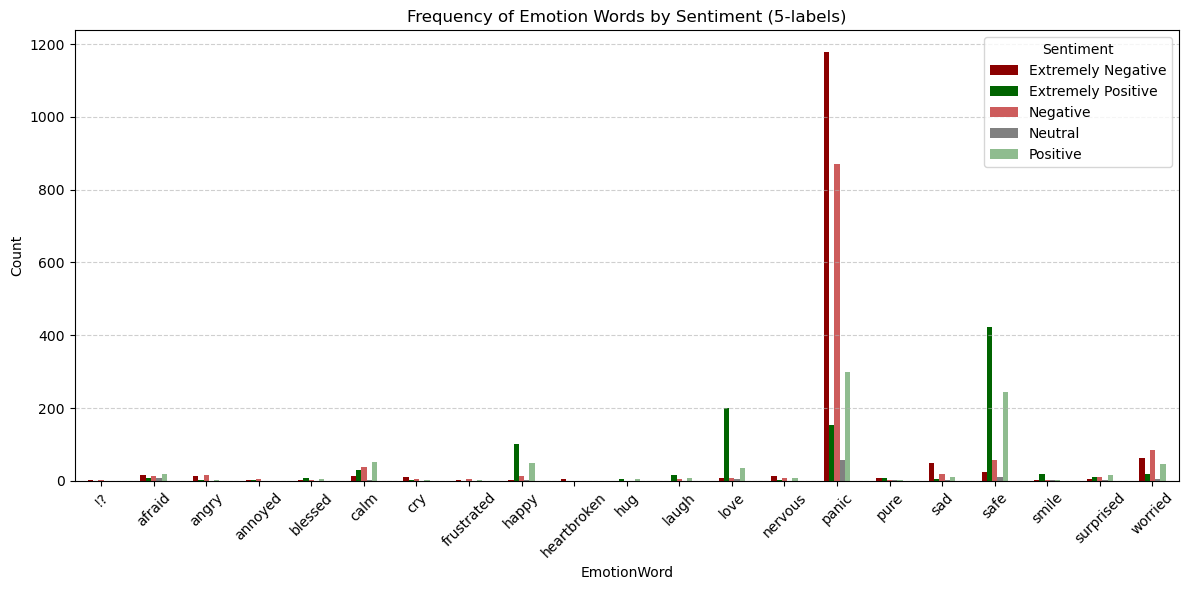

,EmotionWord,Total,Neutral_%,Positive_%,Extremely Negative_%,Negative_%,Extremely Positive_%
20,!?,44955,18.53,27.51,13.51,24.38,16.07
4,panic,2960,3.04,12.33,43.78,34.49,6.35
14,safe,998,1.80,32.26,2.91,7.11,55.91
10,love,298,4.70,16.11,2.68,3.36,73.15
16,worried,217,2.76,21.66,29.95,36.87,8.76
11,happy,188,1.06,29.26,1.60,6.91,61.17
2,calm,175,2.86,36.57,10.86,26.29,23.43
1,sad,114,1.75,13.16,51.75,28.07,5.26
5,afraid,72,13.89,27.78,25.00,20.83,12.50
12,laugh,59,3.39,37.29,1.69,13.56,44.07


In [128]:
# Emotion words list
emotions_list = [
    "smile", "sad", "calm", "surprised", "panic",
    "afraid", "cry", "annoyed", "frustrated",
    "angry", "love", "happy", "laugh", "pure", "safe",
    "nervous", "worried", "hug", "heartbroken", "blessed", "!?"
]

# Function to extract emotion word frequencies by sentiment
def extract_emotions_by_sentiment(df, emotion_words):
    results = []

    for sentiment in df['Sentiment'].unique():
        subset = df[df['Sentiment'] == sentiment]
        text = ' '.join(subset['OriginalTweet'].astype(str)).lower()
        for word in emotion_words:
            count = text.split().count(word)
            results.append({'EmotionWord': word, 'Sentiment': sentiment, 'Count': count})

    return pd.DataFrame(results)

# Extract emotion frequencies
emotion_stats = extract_emotions_by_sentiment(combined_df, emotions_list)

# Pivot for plotting
pivot_emotion = emotion_stats.pivot(index='EmotionWord', columns='Sentiment', values='Count').fillna(0)

# Define consistent colors for sentiment labels
sentiment_colors = {
    'Extremely Negative': 'darkred',
    'Negative': 'indianred',
    'Neutral': 'gray',
    'Positive': 'darkseagreen',
    'Extremely Positive': 'darkgreen'
}

# Plot
ax = pivot_emotion.plot(
    kind='bar',
    stacked=False,
    color=[sentiment_colors.get(sentiment, 'black') for sentiment in pivot_emotion.columns],
    figsize=(12, 6)
)

plt.title("Frequency of Emotion Words by Sentiment (5-labels)")
plt.ylabel("Count")
plt.xlabel("EmotionWord")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# פונקציה לחישוב אחוזים לפי סנטימנט לכל מילה רגשית
def emotion_sentiment_percentages(df, emotion_words):
    sentiment_counts = []

    for word in emotion_words:
        word_rows = df[df['OriginalTweet'].str.contains(fr'\b{word}\b', case=False, na=False)]
        total = len(word_rows)
        if total == 0:
            continue

        counts = word_rows['Sentiment'].value_counts(normalize=True) * 100
        row = {'EmotionWord': word, 'Total': total}
        for sentiment in df['Sentiment'].unique():
            row[f'{sentiment}_%'] = round(counts.get(sentiment, 0), 2)
        sentiment_counts.append(row)

    return pd.DataFrame(sentiment_counts)

# הפעלת הפונקציה על combined_df
results = emotion_sentiment_percentages(combined_df, emotions_list)

display(results.sort_values(by='Total', ascending=False))


- `!?` appears most (44.9K) with balanced sentiment – expresses intensity, not polarity.
- **Negative-emotion words** like `panic`, `sad`, `worried`, `angry`, `cry`, `frustrated` are >70% Negative/Extremely Negative.
- **Positive-emotion words** like `love`, `happy`, `safe`, `hug`, `smile` are >60% Positive/Extremely Positive.
- `heartbroken`: 100% Extremely Negative (though rare).
- `calm` and `pure` show mixed sentiment – context-dependent.
- Differentiating between "positive" and "extremely positive" (and so on the negative side) often relies on deep emotional context, and not just on words like love, happy, panic. Most of them are not really enough to determine intensity - certainly not in general in normal tokenization. So what can be done: Consider unifying the labels into 3 groups: Positive, Neutral, Negative


Word analysis (not include #):

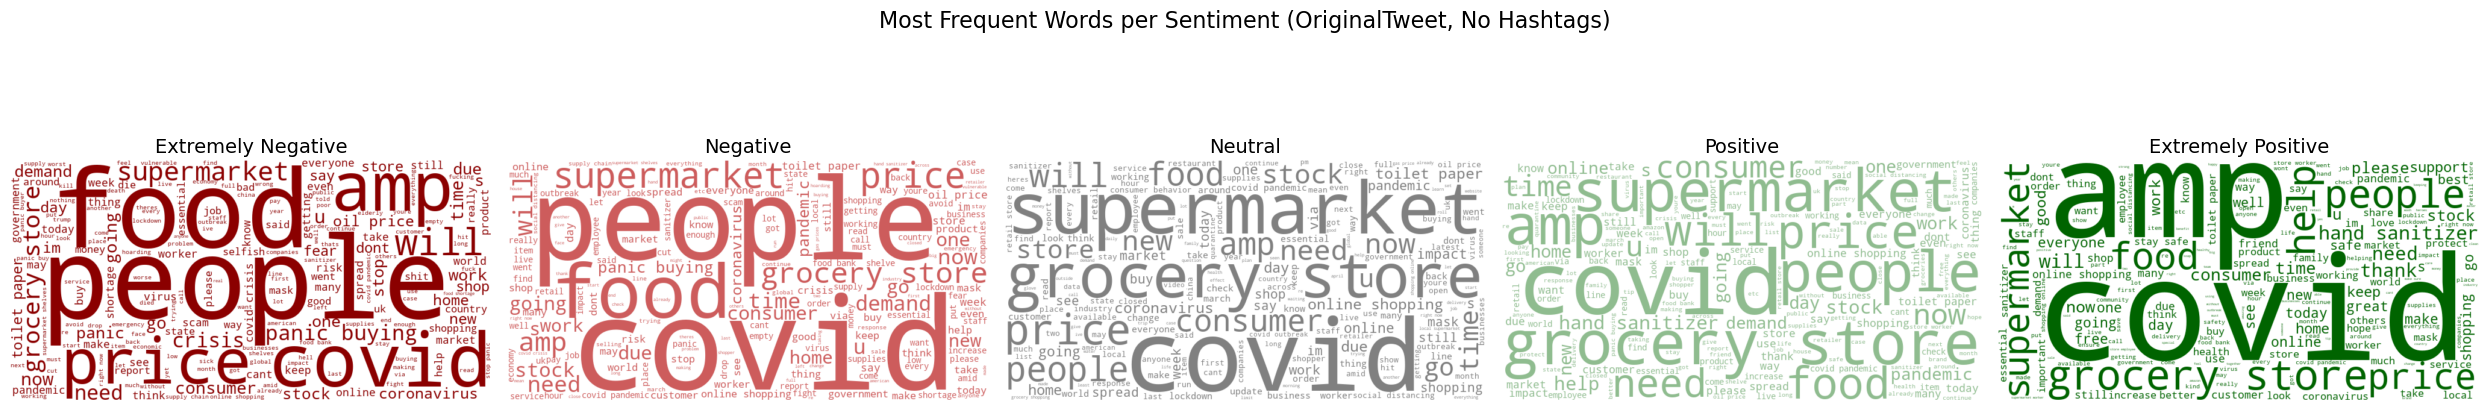

In [134]:
# Ensure lowercase and remove hashtags
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"#\w+", "", text)  # remove hashtags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    return text

combined_df['CleanedText'] = combined_df['OriginalTweet'].astype(str).apply(clean_text)

# Generate word clouds per sentiment
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for ax, sentiment in zip(axs, sentiment_colors.keys()):
    text = ' '.join(combined_df[combined_df['Sentiment'] == sentiment]['CleanedText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=None,
                          color_func=lambda *args, **kwargs: sentiment_colors[sentiment]).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(sentiment, fontsize=14)
    ax.axis('off')

plt.suptitle("Most Frequent Words per Sentiment (OriginalTweet, No Hashtags)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Most Frequent** Words per Sentiment (OriginalTweet, No Hashtags):

In [151]:
# Re-define the cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"#\w+", "", text)  # remove hashtags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    return text

# Apply the cleaning
combined_df['CleanedText'] = combined_df['OriginalTweet'].astype(str).apply(clean_text)

# Define colors per sentiment
sentiment_colors = {
    "Extremely Negative": "red",
    "Negative": "orangered",
    "Neutral": "gray",
    "Positive": "mediumseagreen",
    "Extremely Positive": "darkgreen"
}

top_words_by_sentiment = {}
for sentiment in sentiment_colors.keys():
    text = ' '.join(combined_df[combined_df['Sentiment'] == sentiment]['CleanedText'])
    words = text.split()
    word_counts = Counter(words)
    top_words_by_sentiment[sentiment] = word_counts.most_common(60)

# Define stopwords
stopwords = {'the','to','and','of','a','in','for','is','are','its','their','so','i','you','on','this','that','with','it','we','have','as','be','my','our','all','can','not','but','from','or','has','up','if','more','by','at','they','will','covid','your'}

# Remove stopwords from each list
filtered_words_per_label = {
    label: [word for word, count in words if word not in stopwords]
    for label, words in top_words_by_sentiment.items()
}

# Convert the dictionary to a DataFrame
max_len = max(len(words) for words in filtered_words_per_label.values())
df_filtered_words = pd.DataFrame({
    label: words + [''] * (max_len - len(words))
    for label, words in filtered_words_per_label.items()
})

df_filtered_words


,Extremely Negative,Negative,Neutral,Positive,Extremely Positive
0,food,prices,store,store,store
1,prices,food,supermarket,prices,amp
2,people,supermarket,grocery,grocery,grocery
3,panic,store,prices,food,food
4,no,people,consumer,supermarket,supermarket
5,supermarket,grocery,food,people,help
6,amp,amp,shopping,amp,prices
7,crisis,no,online,consumer,hand
8,store,out,people,out,people
9,buying,panic,how,online,sanitizer


**Unique** Words per Sentiment (OriginalTweet, No Hashtags):

In [152]:
# Create sets of filtered words for each sentiment
filtered_sets = {label: set(words) for label, words in filtered_words_per_label.items()}

# Identify unique words for each sentiment (not in any other sentiment's list)
unique_words_per_label = {}
all_labels = list(filtered_sets.keys())

for label in all_labels:
    other_labels = [l for l in all_labels if l != label]
    others_union = set().union(*(filtered_sets[l] for l in other_labels))
    unique_words = filtered_sets[label] - others_union
    unique_words_per_label[label] = sorted(list(unique_words))

# Convert to DataFrame for display
max_len_unique = max(len(words) for words in unique_words_per_label.values())
df_unique_words = pd.DataFrame({
    label: words + [''] * (max_len_unique - len(words))
    for label, words in unique_words_per_label.items()
})

df_unique_words

,Extremely Negative,Negative,Neutral,Positive,Extremely Positive
0,buying,demand,coronavirus,,help
1,crisis,,go,,please
2,there,,pandemic,,sanitizer
3,,,stock,,us
4,,,what,,workers


**Unique words per sentiment:**

In [153]:
# Recalculate filtered_unique_words_per_label based on filtered_words_per_label
all_words_set = {
    sentiment: set(words) for sentiment, words in filtered_words_per_label.items()
}

# Identify unique words per sentiment
filtered_unique_words_per_label = {}
for sentiment, words in all_words_set.items():
    other_words = set().union(*(v for k, v in all_words_set.items() if k != sentiment))
    unique = words - other_words
    filtered_unique_words_per_label[sentiment] = list(unique)

# Now recalculate frequencies of those unique words
unique_word_frequencies = {}
for sentiment, text in sentiment_texts.items():
    words = text.split()
    word_counts = Counter(words)
    unique_words = set(filtered_unique_words_per_label[sentiment])
    unique_word_frequencies[sentiment] = {
        word: word_counts[word] for word in unique_words if word in word_counts
    }

# Convert to DataFrame for display
unique_freq_df = pd.DataFrame.from_dict(unique_word_frequencies, orient='index').transpose().fillna(0).astype(int)
unique_freq_df

,Extremely Negative,Negative,Neutral,Extremely Positive
buying,744,0,0,0
crisis,874,0,0,0
there,502,0,0,0
demand,0,954,0,0
pandemic,0,0,460,0
coronavirus,0,0,484,0
what,0,0,501,0
go,0,0,394,0
stock,0,0,404,0
workers,0,0,0,735



We identified words that appear exclusively in one sentiment class and calculated their frequencies. Key observations include:

* Extremely Negative tweets uniquely mention words like crisis (874), buying (744), and there (502), reflecting panic and urgency.

* Negative tweets are characterized by demand (954), suggesting economic pressure or shortages.

* Neutral tweets include factual or situational terms like pandemic (460), coronavirus (484), what (501), go (394), and stock (404), reflecting more informative or descriptive content.

* Extremely Positive tweets stand out with emotionally charged and action-oriented words such as help (1061), sanitizer (864), please (764), and workers (735), pointing to calls for support or appreciation during the crisis.

This analysis highlights how word exclusivity and frequency can support fine-grained sentiment classification, especially for identifying extreme tones.

Link and Mention Counts:

,OriginalTweet,Sentiment,link_count,user_mention_count
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,3,3
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,0,0
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1,0
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#covid #covid #covid #covid #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1,0
4,"Me, ready to go at supermarket during the #covid outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #covid is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#covid #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,1,0


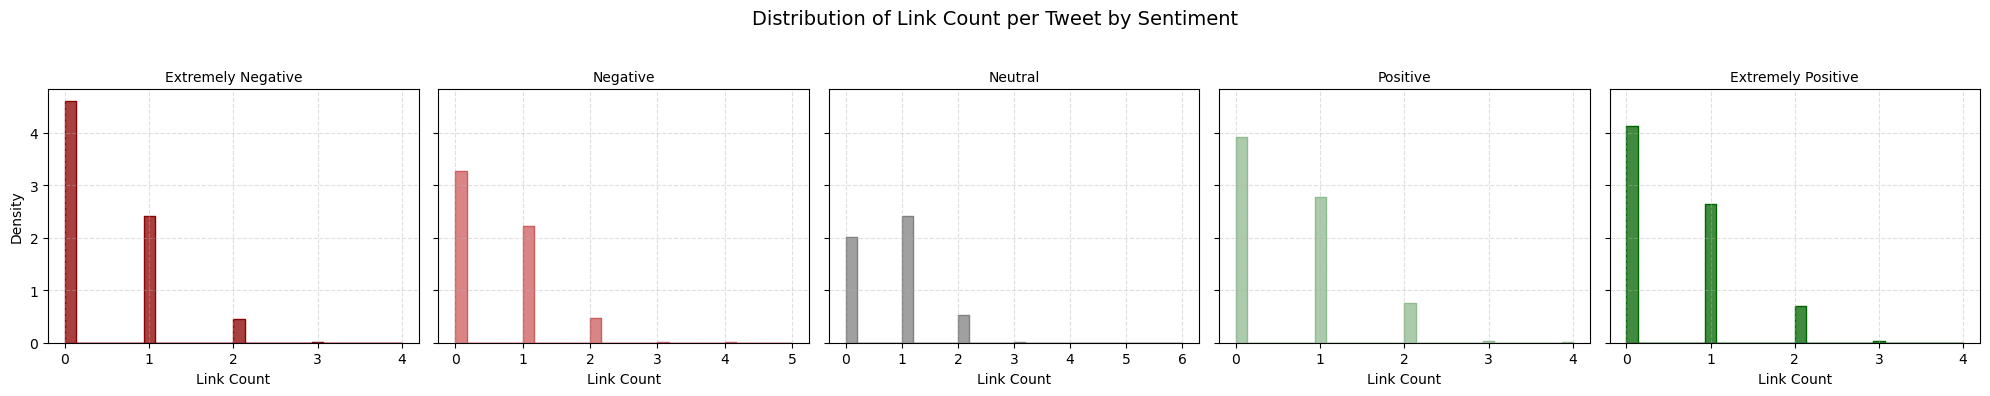

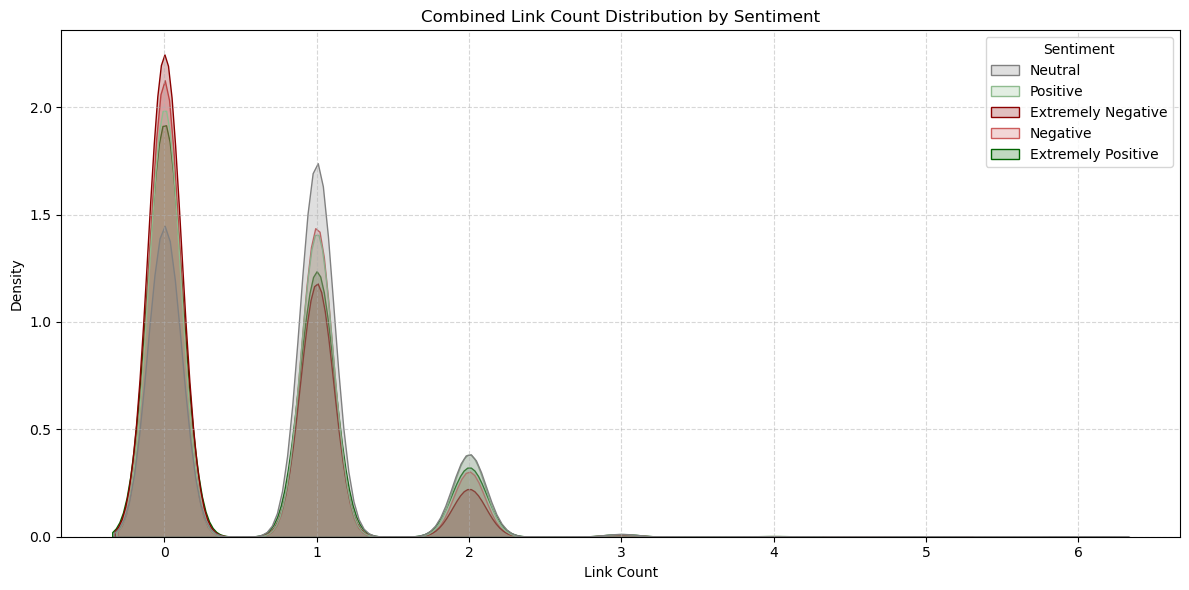

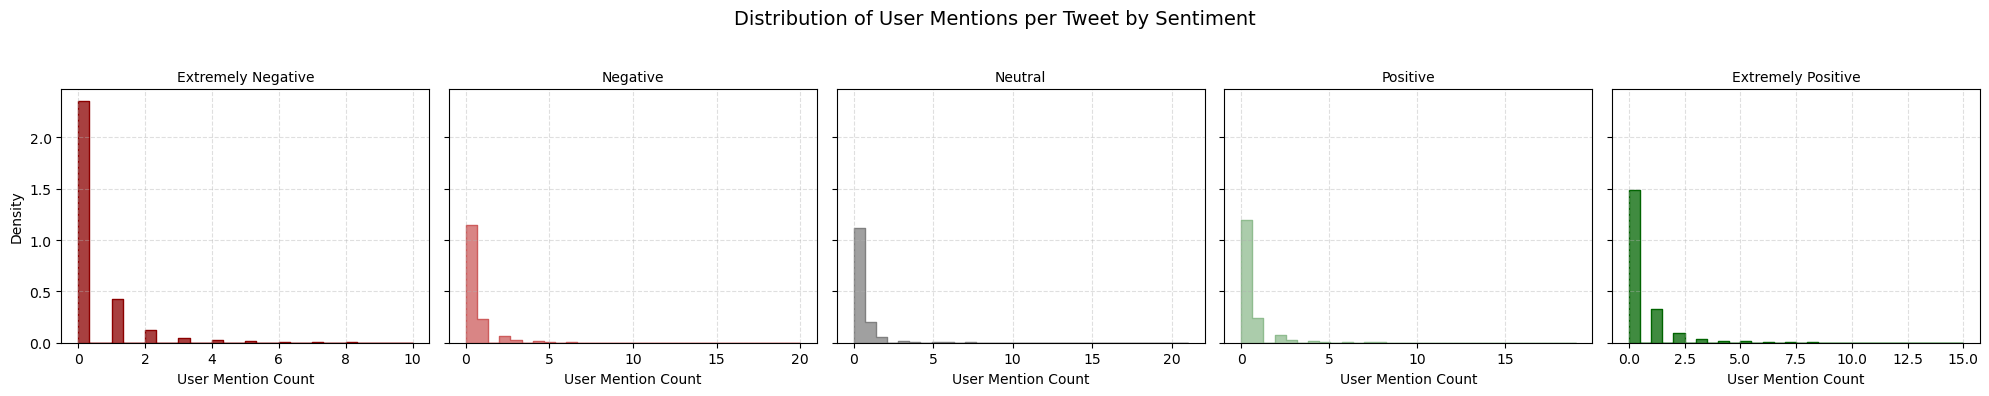

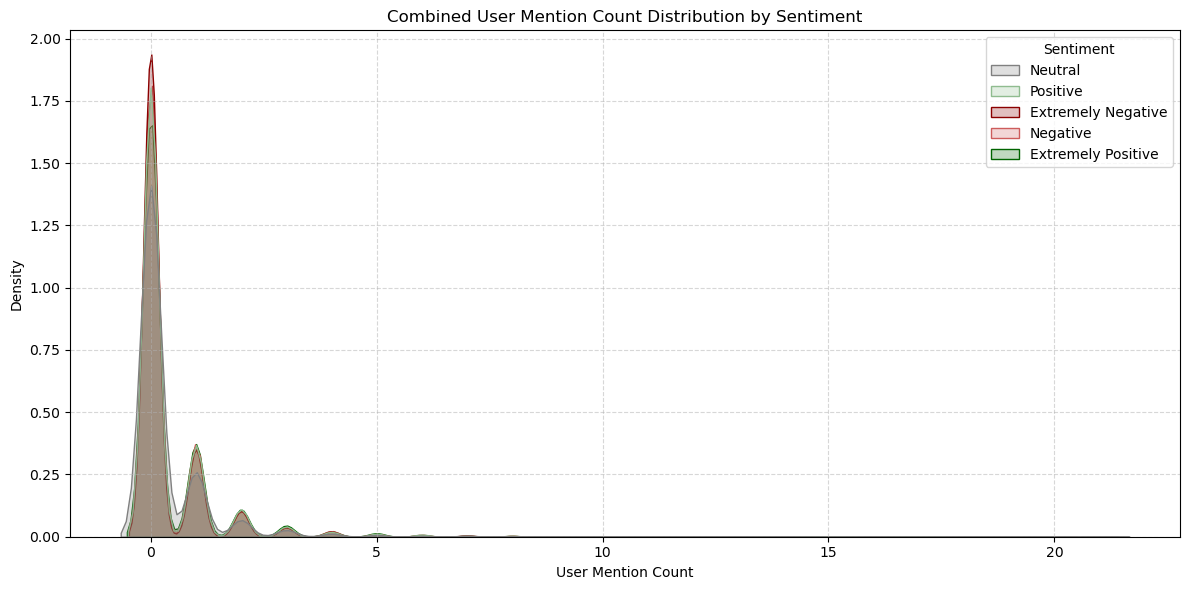

In [155]:
# 1. Count number of links in each tweet
def count_links(text):
    return len(re.findall(r"http\S+|www\S+|https\S+", str(text)))

combined_df['link_count'] = combined_df['OriginalTweet'].apply(count_links)

# 2. Count number of @user mentions in each tweet
def count_user_mentions(text):
    return len(re.findall(r"@\w+", str(text)))

combined_df['user_mention_count'] = combined_df['OriginalTweet'].apply(count_user_mentions)

# Define sentiment order and colors
sentiment_order = [
    'Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'
]
sentiment_palette = {
    'Extremely Negative': 'darkred',
    'Negative': 'indianred',
    'Neutral': 'grey',
    'Positive': 'darkseagreen',
    'Extremely Positive': 'darkgreen'
}

display(combined_df[['OriginalTweet', 'Sentiment', 'link_count', 'user_mention_count']].head(5))

# Create histogram plots for link counts by sentiment
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, sentiment in enumerate(sentiment_order):
    ax = axes[i]
    sns.histplot(
        data=combined_df[combined_df['Sentiment'] == sentiment],
        x='link_count',
        stat='density',
        bins=30,
        element='step',
        color=sentiment_palette[sentiment],
        ax=ax
    )
    ax.set_title(f"{sentiment}", fontsize=10)
    ax.set_xlabel("Link Count")
    if i == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.4)

fig.suptitle('Distribution of Link Count per Tweet by Sentiment', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Combined KDE for link count
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_df, x='link_count', hue='Sentiment', fill=True, common_norm=False, palette=sentiment_palette)
plt.title('Combined Link Count Distribution by Sentiment')
plt.xlabel('Link Count')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histogram plots for user mention count by sentiment
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, sentiment in enumerate(sentiment_order):
    ax = axes[i]
    sns.histplot(
        data=combined_df[combined_df['Sentiment'] == sentiment],
        x='user_mention_count',
        stat='density',
        bins=30,
        element='step',
        color=sentiment_palette[sentiment],
        ax=ax
    )
    ax.set_title(f"{sentiment}", fontsize=10)
    ax.set_xlabel("User Mention Count")
    if i == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle='--', alpha=0.4)

fig.suptitle('Distribution of User Mentions per Tweet by Sentiment', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Combined KDE for user mention count
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_df, x='user_mention_count', hue='Sentiment', fill=True, common_norm=False, palette=sentiment_palette)
plt.title('Combined User Mention Count Distribution by Sentiment')
plt.xlabel('User Mention Count')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Tweets across all sentiments typically contain 0–1 links, with no strong correlation between link frequency and sentiment.

Similarly, user mentions are sparse and highly skewed toward 0; they do not significantly distinguish between sentiment categories.

#### EDA Conclutions:

As part of the Exploratory Data Analysis (EDA), we conducted a comprehensive investigation of the textual and structural features within the tweet dataset to evaluate their potential contribution to sentiment classification. Our exploration included the following components:

Hashtag Analysis: We extracted hashtags from the OriginalTweet column, counted their occurrences, and analyzed their frequency distribution across the five sentiment classes. While general hashtags appeared uniformly, we identified that COVID-related hashtags (such as #covid19, #coronavirus, etc.) tended to correlate with specific sentiment groups—particularly negative ones. Based on this insight, we selected this feature for use in modeling.

Word Frequency Distributions: Using cleaned and lowercased versions of the tweet text (with hashtags, links, punctuation, and stopwords removed), we analyzed the top 50 most frequent words per sentiment. We then isolated words that were uniquely common to a specific sentiment class, which may aid interpretability or be used as part of a rule-based or explainable model layer.

Stopword Filtering: We explicitly excluded common function words (e.g., the, and, is, you) to focus only on content-rich terms, which allowed us to better observe thematic differences between sentiments.

Link and Mention Density: We parsed and counted the number of URLs (http...) and user mentions (@username) per tweet, and plotted their distributions per sentiment. These features showed marginal variations across classes, but no dominant patterns were identified—hence they were excluded from the feature set.

Emoji and Gibberish Word Testing: We experimented with emoji detection and investigated the presence of non-standard tokens (e.g., stylized or repetitive characters). However, these elements did not contribute strong or consistent signal and were thus discarded from the feature engineering pipeline.

Overall, only COVID-related hashtags were retained as additional input, as they demonstrated consistent patterns aligned with the sentiment labels. All other tested features were analyzed thoroughly and documented but were not selected for final modeling due to low discriminative power.